In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

development = pd.read_csv("./../DSL_Winter_Project_2024/development.csv")
evaluation = pd.read_csv("./../DSL_Winter_Project_2024/evaluation.csv")

In [4]:
development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [5]:
development.isnull().sum()

x              0
y              0
pmax[0]        0
negpmax[0]     0
area[0]        0
              ..
pmax[17]       0
negpmax[17]    0
area[17]       0
tmax[17]       0
rms[17]        0
Length: 92, dtype: int64

In [6]:
pmax_features = []
negpmax_features = []
tmax_features = []
area_features = []
rms_features = []

for i in range(0, 18):
    pmax_features.append("pmax[%s]" % (i))
    negpmax_features.append("negpmax[%s]" % (i))
    tmax_features.append("tmax[%s]" % (i))
    area_features.append("area[%s]" % (i))
    rms_features.append("rms[%s]" % (i))

all_features= pmax_features + negpmax_features + tmax_features + area_features + rms_features

development[all_features].describe()

pmax[0]        pmax[1]        pmax[2]        pmax[3]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean        4.866423      16.510543       8.784017      26.457888   
std         1.481220      16.781018       7.692692      25.397517   
min         1.394440       2.028134       1.799435       2.034311   
25%         4.123941       5.619728       4.681271       9.327397   
50%         4.668321      10.068513       5.714713      15.071468   
75%         5.265888      19.031319       9.796498      36.166834   
max        20.515415     106.649066      68.837366     136.658588   

             pmax[4]        pmax[5]        pmax[6]        pmax[7]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean       14.947826      39.333002      14.907669       4.849883   
std        13.394484      27.899214      16.613431       1.487651   
min         1.940271       2.476239       1.883002       1.591489   
25%         5.744334      15.949420       5.402504       4.106779   
50%        10.180335      28.257567       8.674725       4.649773   
75%        17.985703      58.928515      16.197600       5.249033   
max        90.635233     138.381650     128.199008      19.777481   

             pmax[8]        pmax[9]  ...         rms[8]         rms[9]  \
count  385500.000000  385500.000000  ...  385500.000000  385500.000000   
mean       20.503279      12.505530  ...       1.389921       1.377497   
std        20.175681      13.862611  ...       0.353814       0.349208   
min         1.440403       1.727530  ...       0.319754       0.294681   
25%         6.471845       4.919528  ...       1.138205       1.129018   
50%        12.660268       6.996239  ...       1.365886       1.353291   
75%        25.451260      13.679469  ...       1.614668       1.598699   
max       128.185635     115.566028  ...       6.390013       5.982645   

             rms[10]        rms[11]        rms[12]        rms[13]  \
count  385500.000000  385500.000000  385500.000000  385500.000000   
mean        1.408877       1.415314       1.364507       1.411607   
std         0.355428       0.356551       0.342913       0.358423   
min         0.324462       0.312743       0.256888       0.327664   
25%         1.155453       1.161411       1.120670       1.156713   
50%         1.383982       1.391340       1.341183       1.386532   
75%         1.635779       1.643028       1.582718       1.640055   
max         6.006217       5.988877       6.379770       6.283808   

             rms[14]        rms[15]        rms[16]        rms[17]  
count  385500.000000  385500.000000  385500.000000  385500.000000  
mean        1.439037       1.370949       0.452944       0.371027  
std         0.366330       0.350003       0.299456       0.081983  
min         0.318347       0.302089       0.129428       0.102138  
25%         1.178395       1.120797       0.342264       0.321753  
50%         1.414197       1.346501       0.400117       0.366981  
75%         1.672101       1.594086       0.466077       0.415578  
max         6.007198       5.859994       5.031400       4.925181  

[8 rows x 90 columns]

In [7]:
# Explore correlations between features

group_feature_0=['pmax[0]', 'negpmax[0]', 'tmax[0]','area[0]', 'rms[0]']
print(development[group_feature_0].corr())
group_feature_5=['pmax[5]', 'negpmax[5]', 'tmax[5]','area[5]', 'rms[5]']
print(development[group_feature_5].corr())
group_feature_7=['pmax[7]', 'negpmax[7]', 'tmax[7]','area[7]', 'rms[7]']
print(development[group_feature_7].corr())
group_feature_11=['pmax[11]', 'negpmax[11]', 'tmax[11]','area[11]', 'rms[11]']
print(development[group_feature_11].corr())

# According to the output, only pmax and area have a tight positive correlation

             pmax[0]  negpmax[0]   tmax[0]   area[0]    rms[0]
pmax[0]     1.000000    0.018335  0.011206  0.327321  0.010996
negpmax[0]  0.018335    1.000000  0.006887  0.023052 -0.003504
tmax[0]     0.011206    0.006887  1.000000  0.022349 -0.060925
area[0]     0.327321    0.023052  0.022349  1.000000 -0.005608
rms[0]      0.010996   -0.003504 -0.060925 -0.005608  1.000000
             pmax[5]  negpmax[5]   tmax[5]   area[5]    rms[5]
pmax[5]     1.000000   -0.951942 -0.056099  0.975946  0.001526
negpmax[5] -0.951942    1.000000  0.050112 -0.932805 -0.000883
tmax[5]    -0.056099    0.050112  1.000000 -0.058688 -0.006960
area[5]     0.975946   -0.932805 -0.058688  1.000000  0.001208
rms[5]      0.001526   -0.000883 -0.006960  0.001208  1.000000
             pmax[7]  negpmax[7]   tmax[7]   area[7]    rms[7]
pmax[7]     1.000000    0.002124  0.008072  0.342097  0.010378
negpmax[7]  0.002124    1.000000  0.001655  0.004301 -0.000479
tmax[7]     0.008072    0.001655  1.000000  0.019431 -0

In [8]:
from scipy.stats import zscore

pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 1.5
pmax_outliers_count=np.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]     11208
pmax[1]     38680
pmax[2]     26839
pmax[3]     44091
pmax[4]     36884
pmax[5]     40553
pmax[6]     31872
pmax[7]     11086
pmax[8]     38668
pmax[9]     28673
pmax[10]    42341
pmax[11]    41035
pmax[12]    13670
pmax[13]    39761
pmax[14]    36737
pmax[15]    51567
pmax[16]    45245
pmax[17]    45736
dtype: int64

In [9]:
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 2
pmax_outliers_count=np.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]      8239
pmax[1]     26180
pmax[2]     18800
pmax[3]     27085
pmax[4]     26028
pmax[5]     18049
pmax[6]     23629
pmax[7]      8199
pmax[8]     24959
pmax[9]     22966
pmax[10]    19545
pmax[11]    26176
pmax[12]    13028
pmax[13]    18014
pmax[14]    27115
pmax[15]    24670
pmax[16]    15438
pmax[17]    18362
dtype: int64

In [10]:
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 3
pmax_outliers_count=np.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]      7731
pmax[1]      9609
pmax[2]      9795
pmax[3]      5189
pmax[4]      9523
pmax[5]       583
pmax[6]     12352
pmax[7]      7739
pmax[8]      8247
pmax[9]     12670
pmax[10]      501
pmax[11]     7449
pmax[12]    12491
pmax[13]      479
pmax[14]    11793
pmax[15]     2431
pmax[16]     2108
pmax[17]     2683
dtype: int64

In [11]:
# Since the pmax data is relatively sensitive to z_score, a smaller(1.5) z_score threshold is selected.
import re

index_count_list= [0 for _ in range(18)]
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 1.5
pmax_outliers_count=np.sum(pmax_is_outlier, axis=0)
pmax_outliers_columns=pmax_outliers_count.nlargest(6)

print(pmax_outliers_columns)
for s in pmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

pmax[15]    51567
pmax[17]    45736
pmax[16]    45245
pmax[3]     44091
pmax[10]    42341
pmax[11]    41035
dtype: int64
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]


In [12]:
negpmax_df = development[negpmax_features]
negpmaz_df_score = negpmax_df.apply(zscore, axis=0)

negpmax_is_outlier = abs(negpmaz_df_score) > 1.5
negpmax_outliers_count=np.sum(negpmax_is_outlier, axis=0)
negpmax_outliers_columns=negpmax_outliers_count.nlargest(6)

print(negpmax_outliers_columns)
for s in negpmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

negpmax[17]    48133
negpmax[16]    46896
negpmax[5]     41009
negpmax[6]      6233
negpmax[1]      1039
negpmax[13]      697
dtype: int64
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2]


In [13]:
tmax_df = development[tmax_features]
tmaz_df_score = tmax_df.apply(zscore, axis=0)

tmax_is_outlier = abs(tmaz_df_score) > 1.5
tmax_outliers_count=np.sum(tmax_is_outlier, axis=0)
tmax_outliers_columns=tmax_outliers_count.nlargest(6)

print(tmax_outliers_columns)
for s in tmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

tmax[2]     67004
tmax[9]     59246
tmax[12]    54157
tmax[6]     51668
tmax[17]    49231
tmax[15]    48811
dtype: int64
[0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 3]


In [14]:
area_df = development[area_features]
area_df_score = area_df.apply(zscore, axis=0)

area_is_outlier = abs(area_df_score) > 1.5
area_outliers_count=np.sum(area_is_outlier, axis=0)
area_outliers_columns=area_outliers_count.nlargest(6)

print(area_outliers_columns)
for s in area_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

area[17]    50761
area[16]    46598
area[15]    45490
area[3]     43509
area[10]    41595
area[11]    40550
dtype: int64
[0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 3, 3, 4]


In [15]:
rms_df = development[rms_features]
rms_df_score = rms_df.apply(zscore, axis=0)

rms_is_outlier = abs(rms_df_score) > 1.5
rms_outliers_count=np.sum(rms_is_outlier, axis=0)
rms_outliers_count

# For rms, there is not much difference in the number of outliers in each column, 
# Therefore, we abandon the separate feature analysis of rms

rms[0]     49510
rms[1]     49472
rms[2]     49586
rms[3]     49635
rms[4]     49300
rms[5]     49478
rms[6]     49637
rms[7]     49530
rms[8]     49358
rms[9]     49226
rms[10]    49124
rms[11]    48915
rms[12]    49088
rms[13]    49163
rms[14]    49177
rms[15]    49119
rms[16]     8733
rms[17]    29647
dtype: int64

## PAIRPLOTS
We have seen that *area* and *pmax* are the only feature with a linear relation. 
Now we want to check if there is any eventual **non-linear** relationship. For this reason, use **pairplot** to compute the scatterplot between features, for each reading. 
Moreover, if we detect that some some reading has a scatterplot that differs significantly from the other readings, we can consider them as candidate outliers.

### Reading 0
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


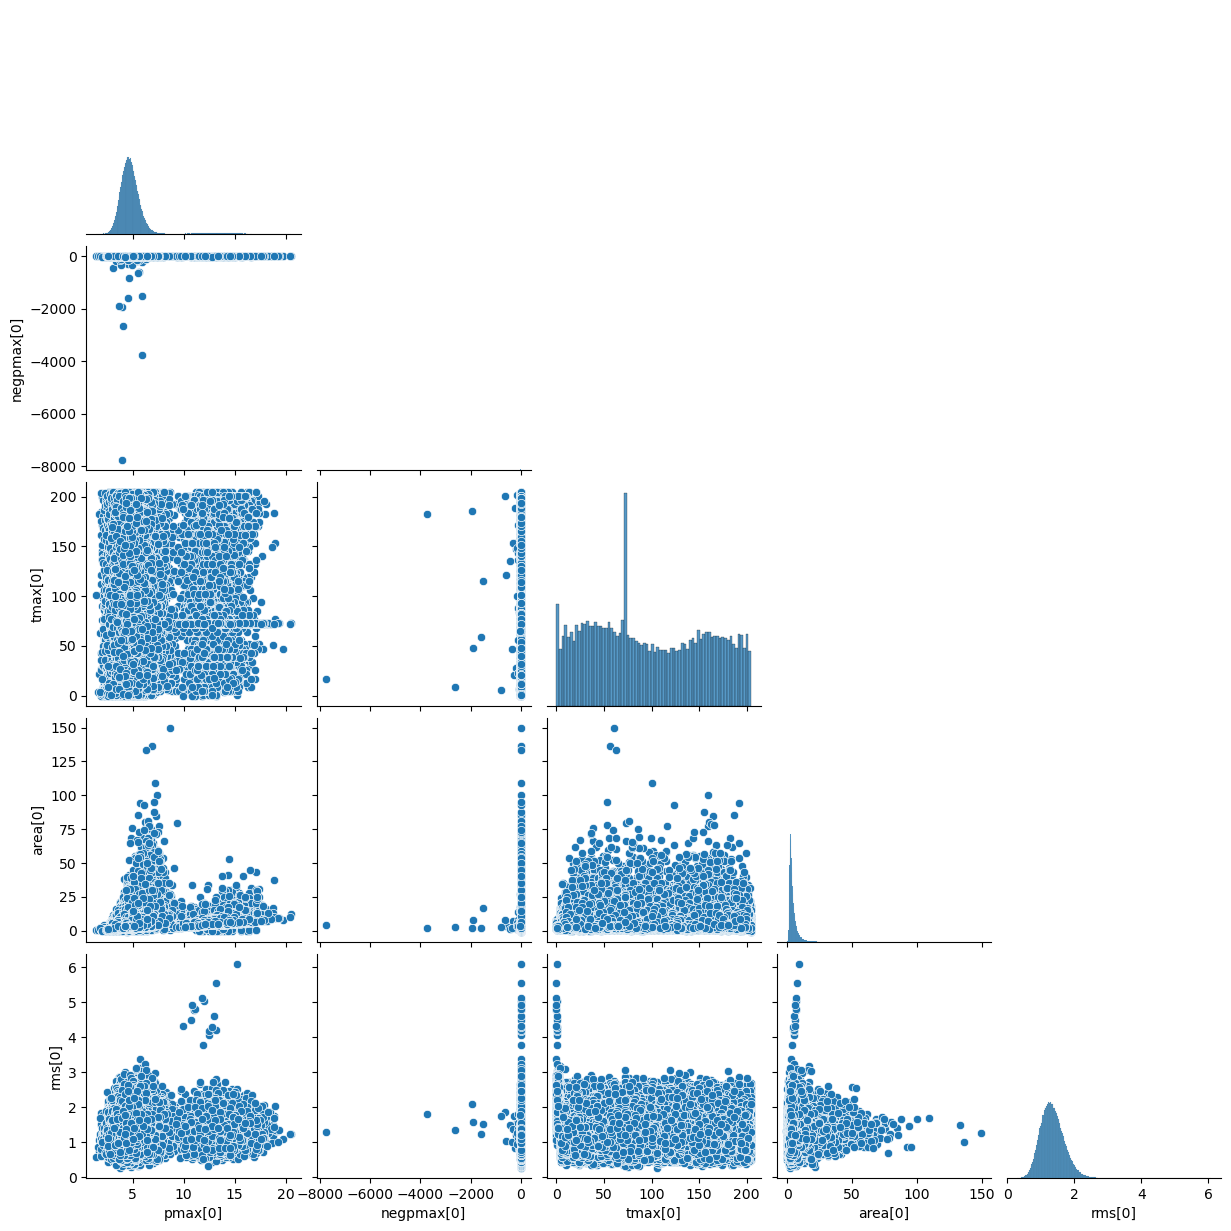

In [17]:
import seaborn as sns

data = development[['pmax[0]','negpmax[0]','tmax[0]','area[0]','rms[0]']]
sns.pairplot(data, corner=True)

As it was also seen for their correlation, the scatterplot between pmax[0] and area[0] doesn't show a linear trend. Hence it is a candidate outlier.

### Reading 1
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


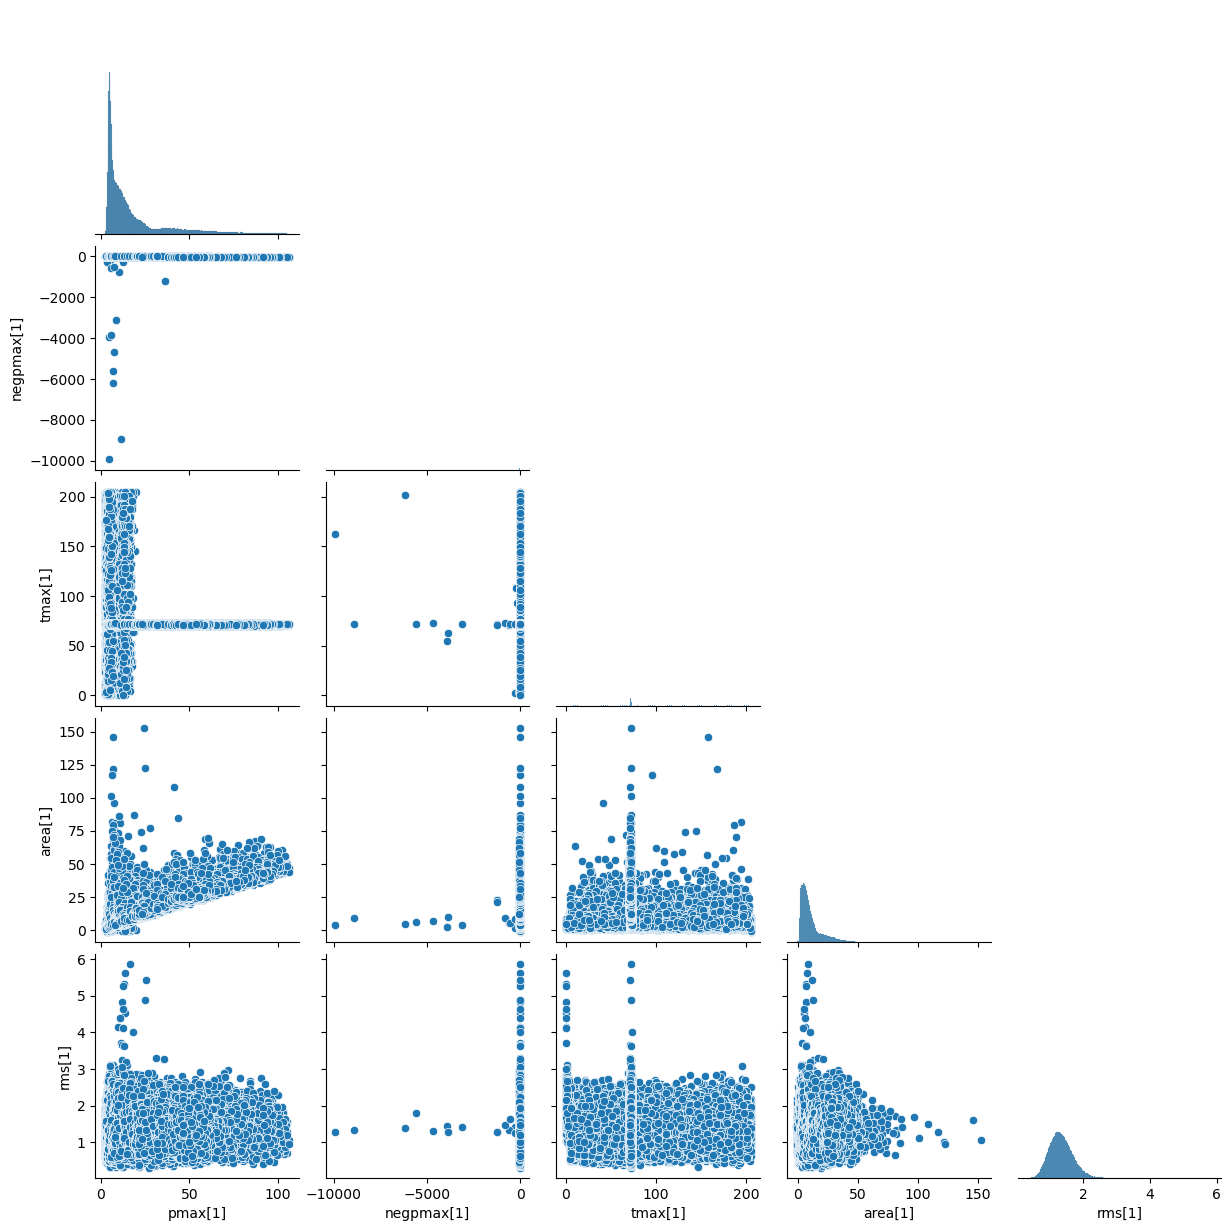

In [ ]:

data = development[['pmax[1]','negpmax[1]','tmax[1]','area[1]','rms[1]']]
sns.pairplot(data, corner=True)


### Reading 2
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


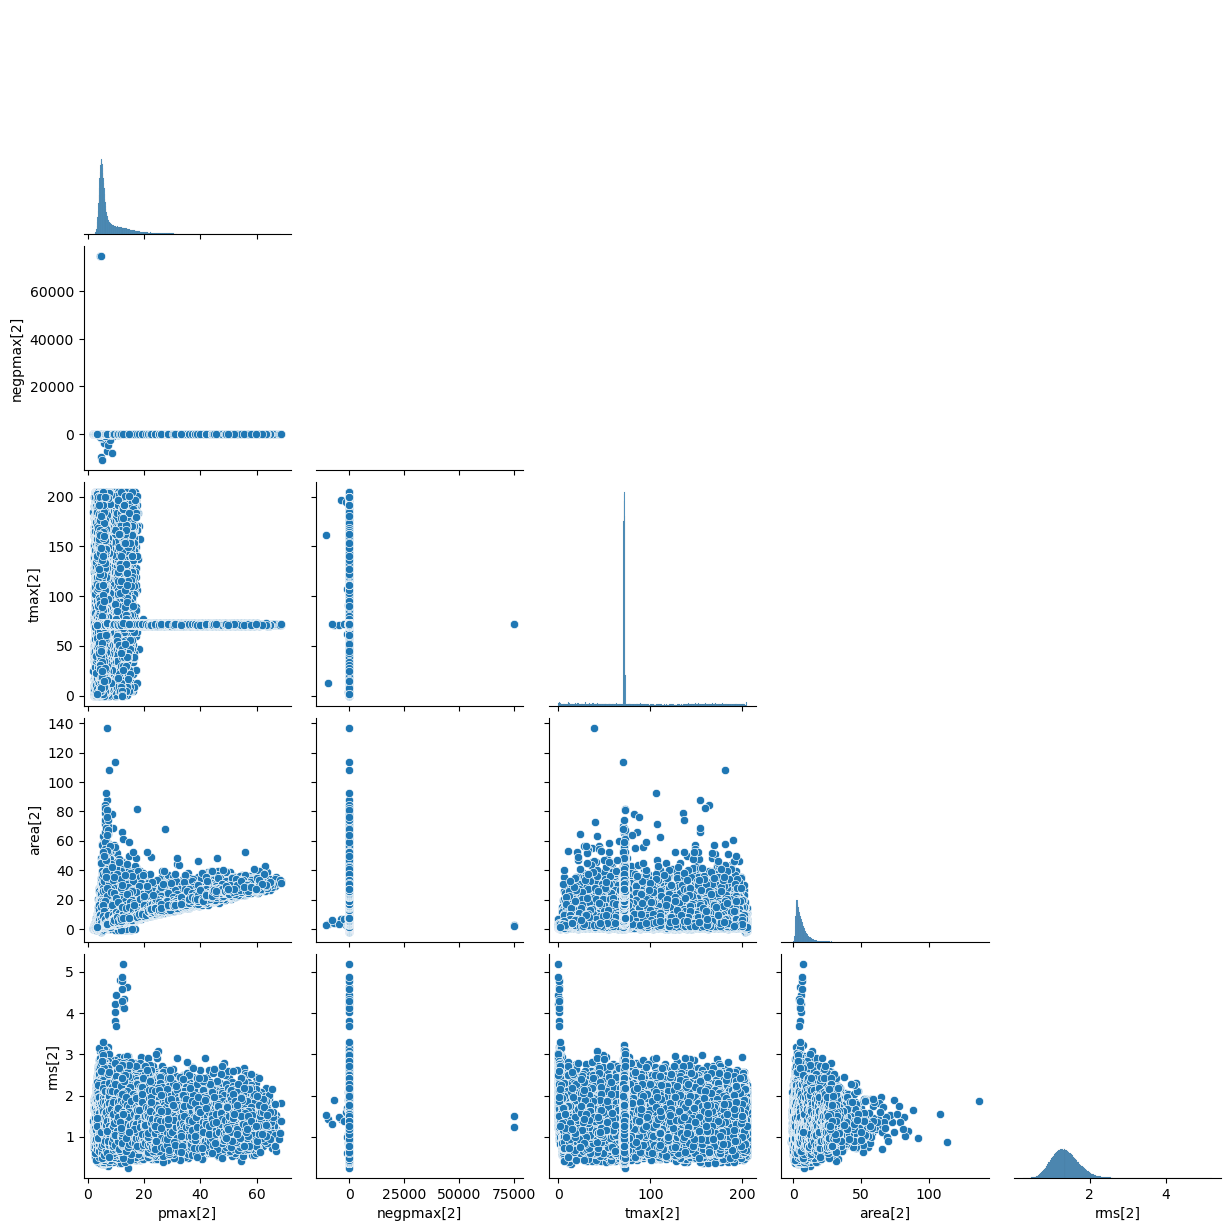

In [ ]:

data = development[['pmax[2]','negpmax[2]','tmax[2]','area[2]','rms[2]']]
sns.pairplot(data, corner=True)


### Reading 3
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


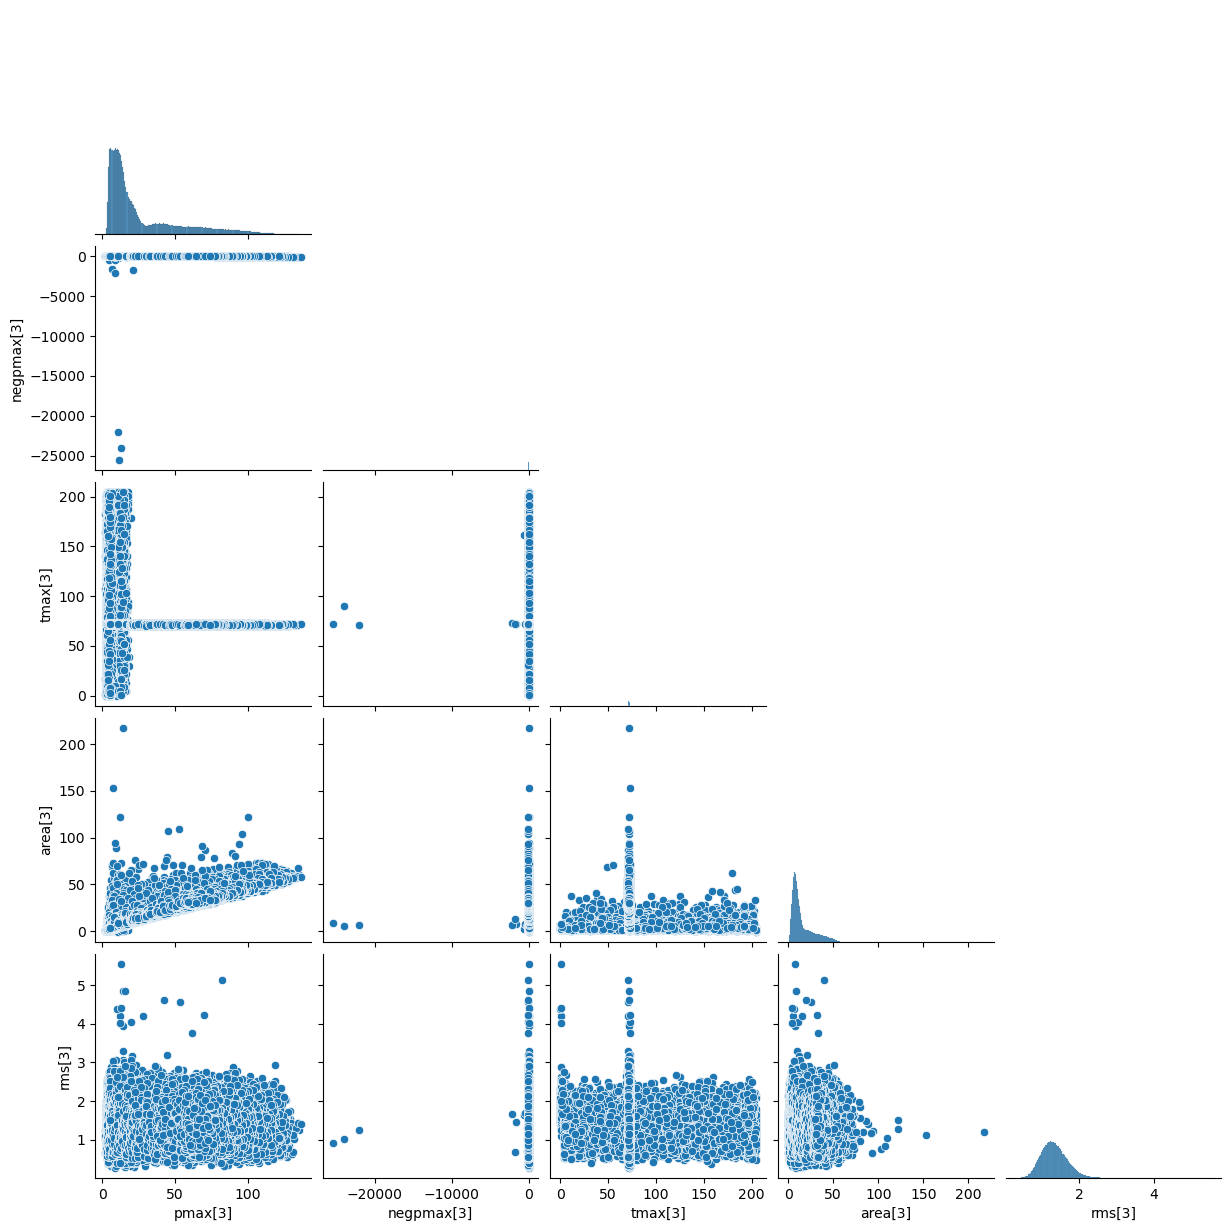

In [ ]:

data = development[['pmax[3]','negpmax[3]','tmax[3]','area[3]','rms[3]']]
sns.pairplot(data, corner=True)


### Reading 4
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


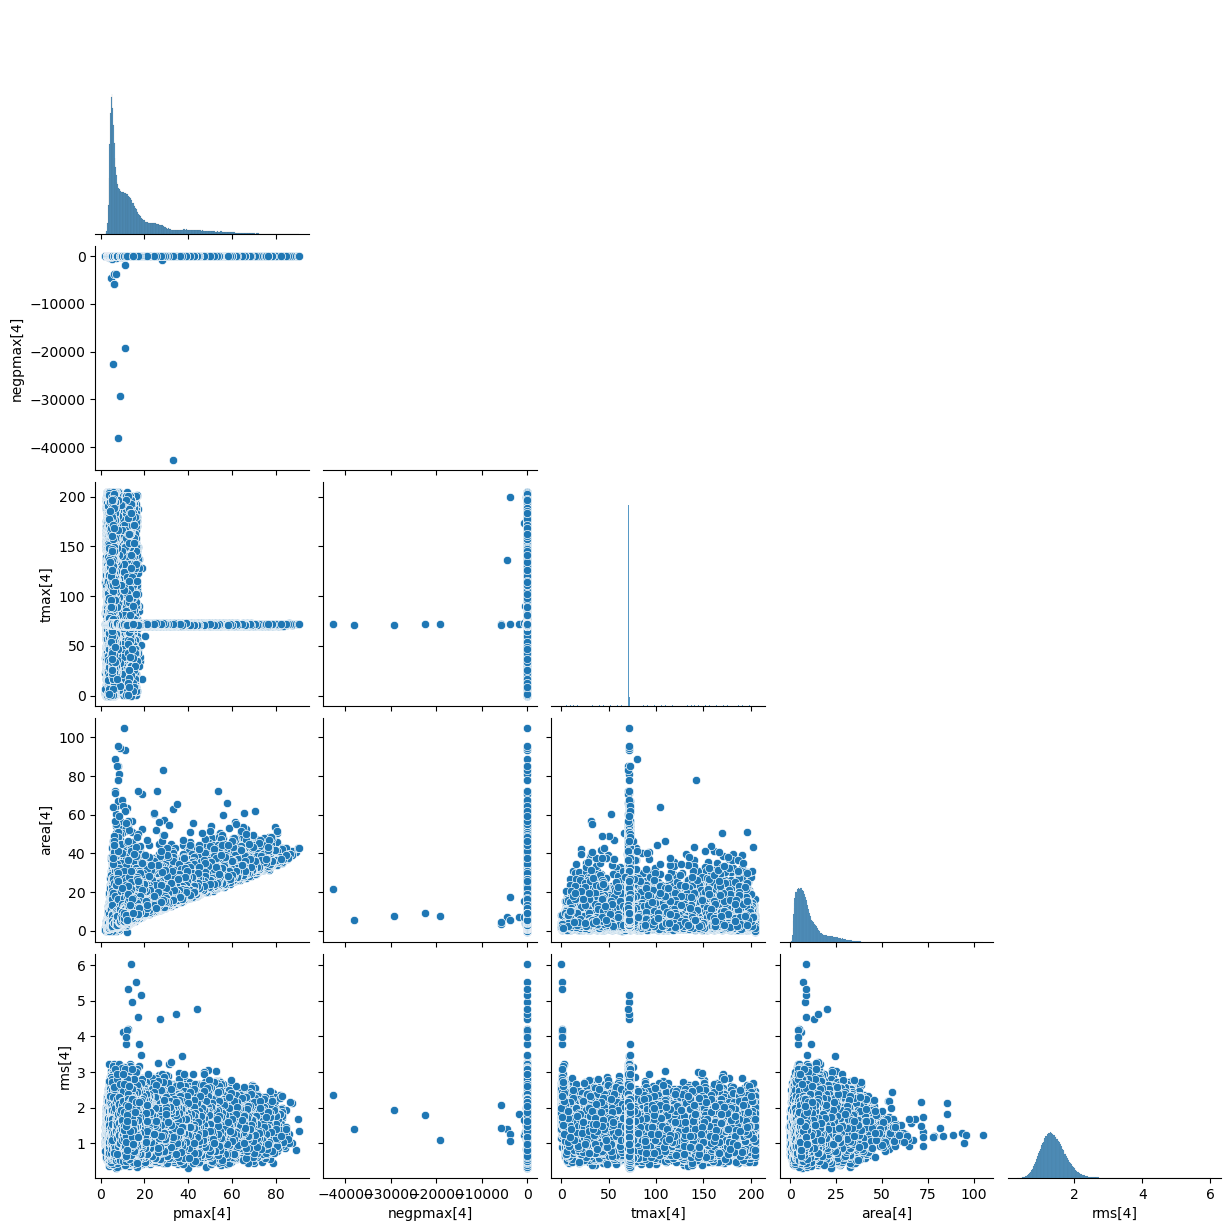

In [ ]:

data = development[['pmax[4]','negpmax[4]','tmax[4]','area[4]','rms[4]']]
sns.pairplot(data, corner=True)


### Reading 5
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


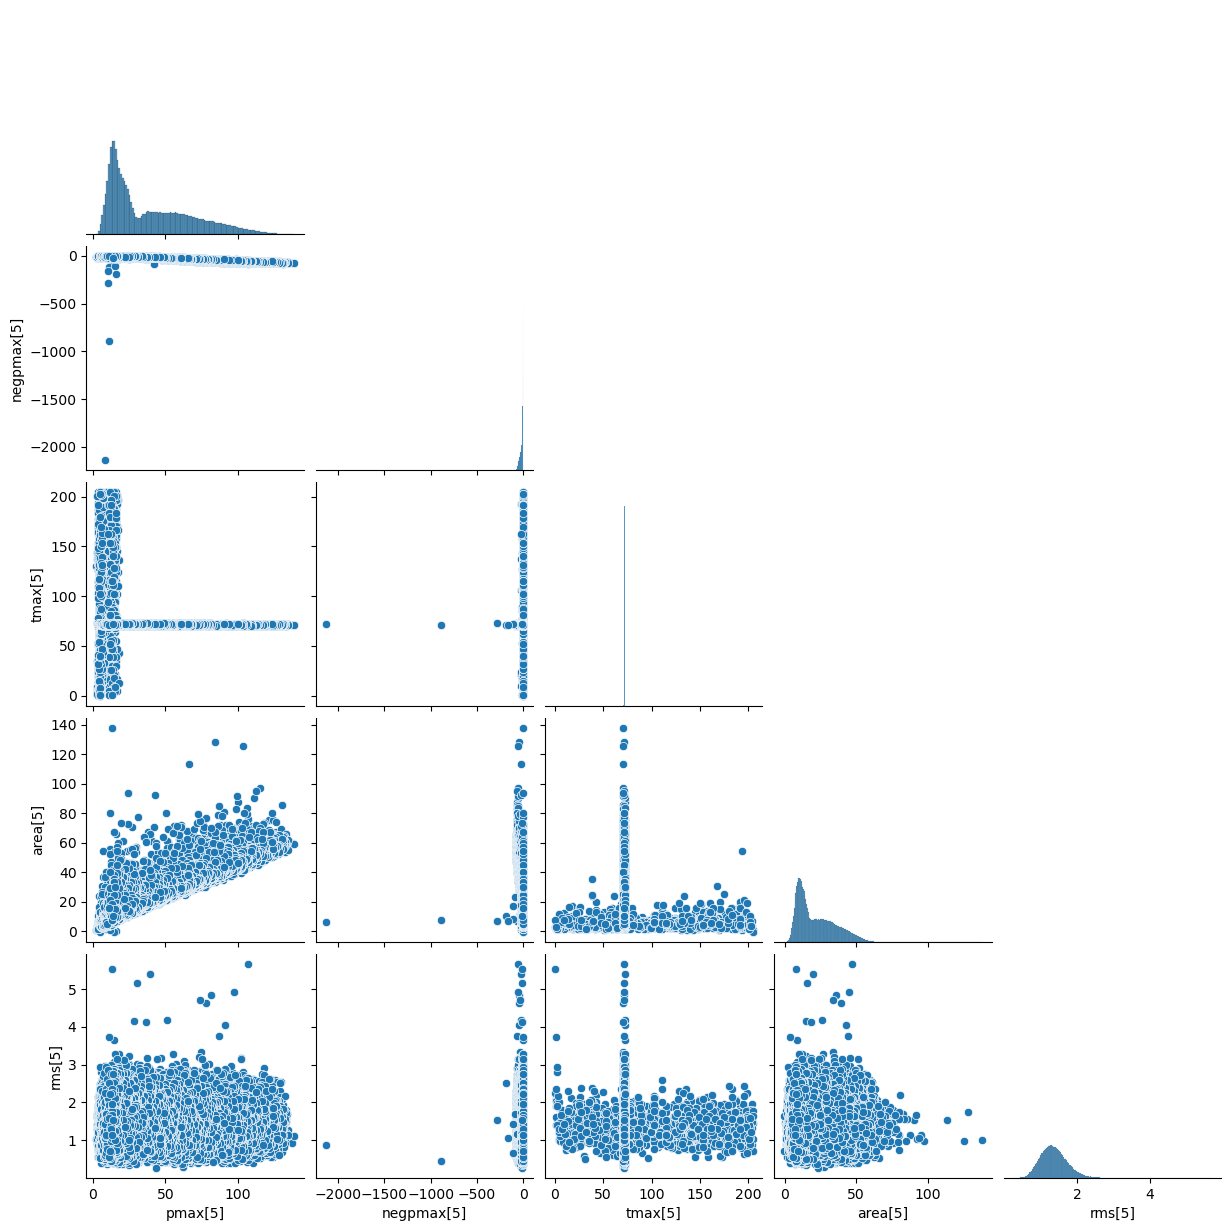

In [ ]:

data = development[['pmax[5]','negpmax[5]','tmax[5]','area[5]','rms[5]']]
sns.pairplot(data, corner=True)


### Reading 6
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


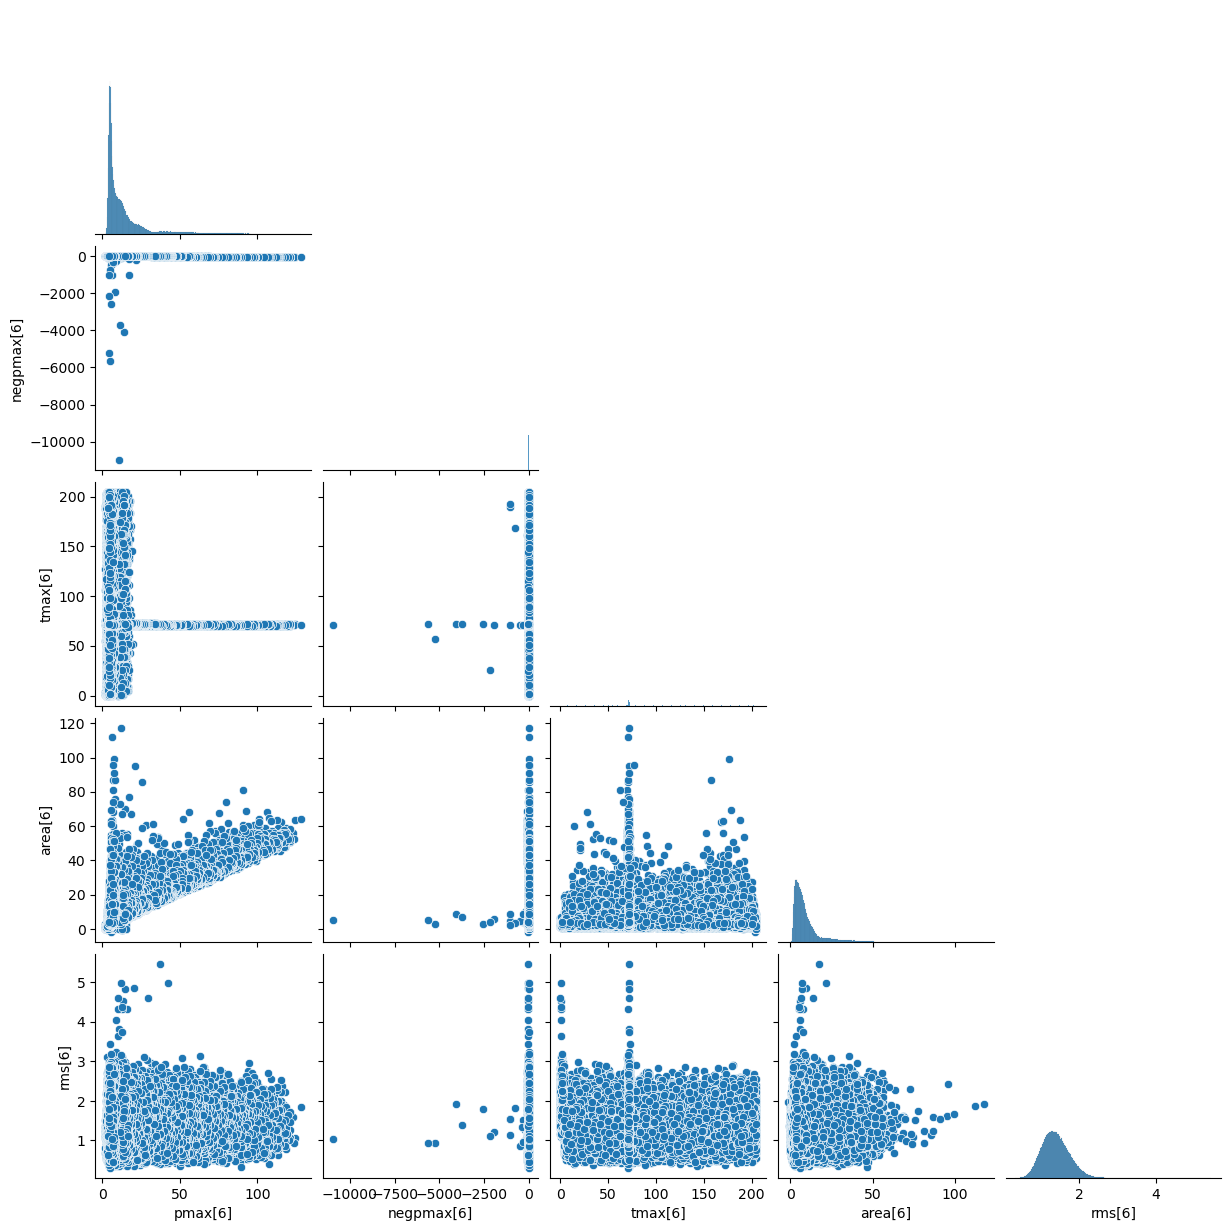

In [ ]:

data = development[['pmax[6]','negpmax[6]','tmax[6]','area[6]','rms[6]']]
sns.pairplot(data, corner=True)


### Reading 7
No evidence of non-linear .
However, we notice that the pmax-area pairplot doesn't show a linear trend. Morevover, the distribution between tmax and distribution is remarkably different from the readings 1,2,3,4,5,6.
Hence, we consider reading 7 as an outlier candidate.

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


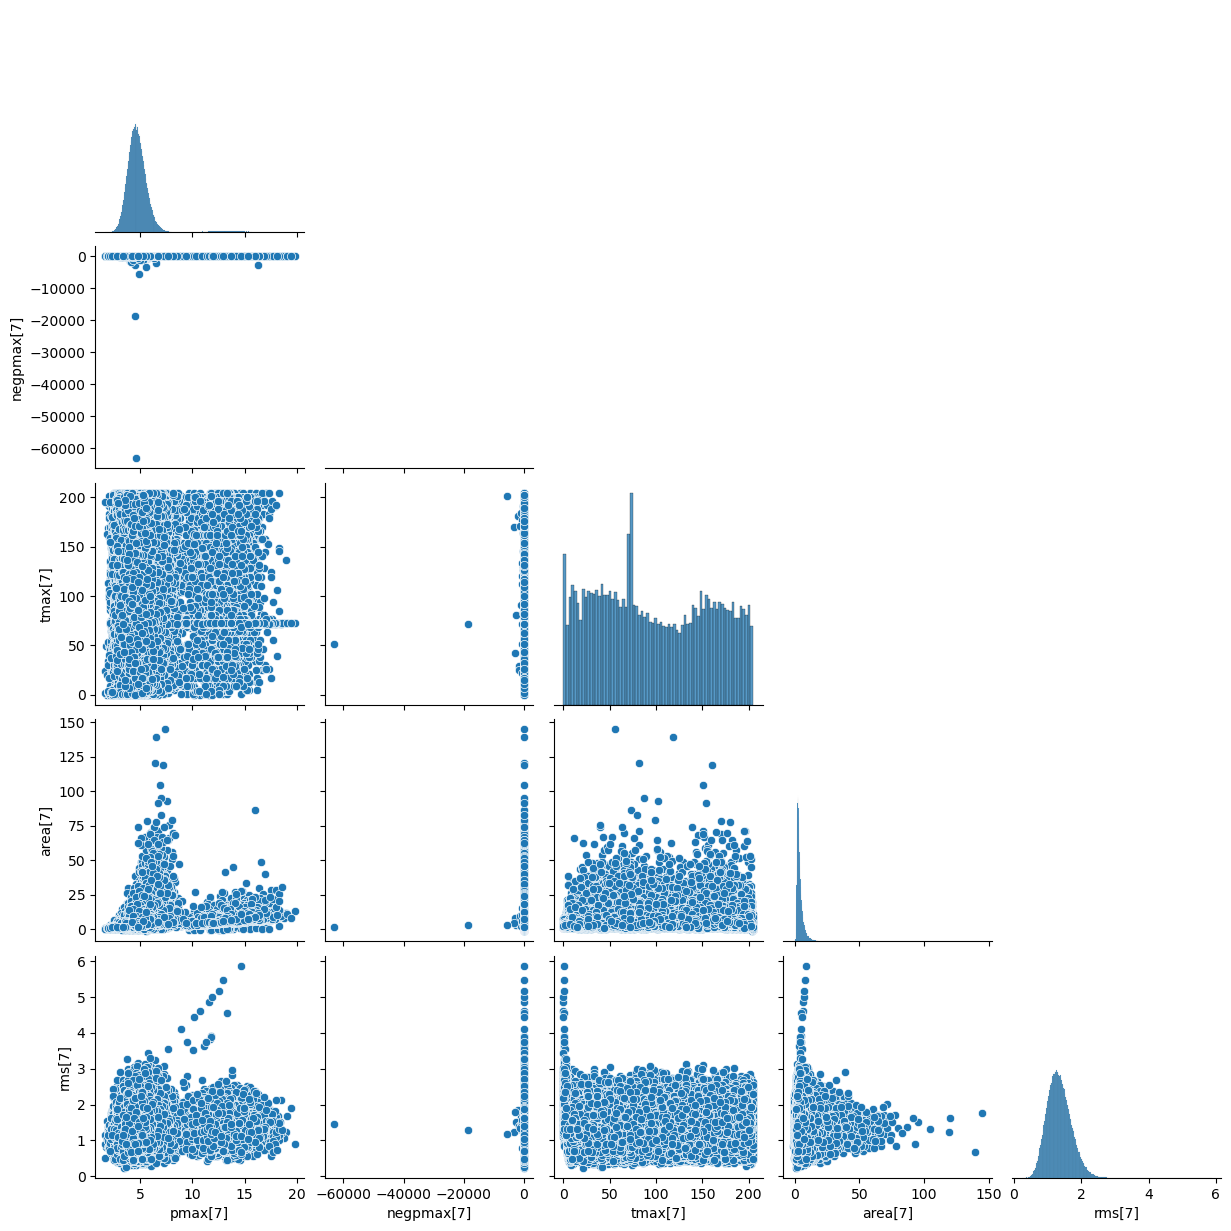

In [ ]:

data = development[['pmax[7]','negpmax[7]','tmax[7]','area[7]','rms[7]']]
sns.pairplot(data, corner=True)


### Reading 8
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


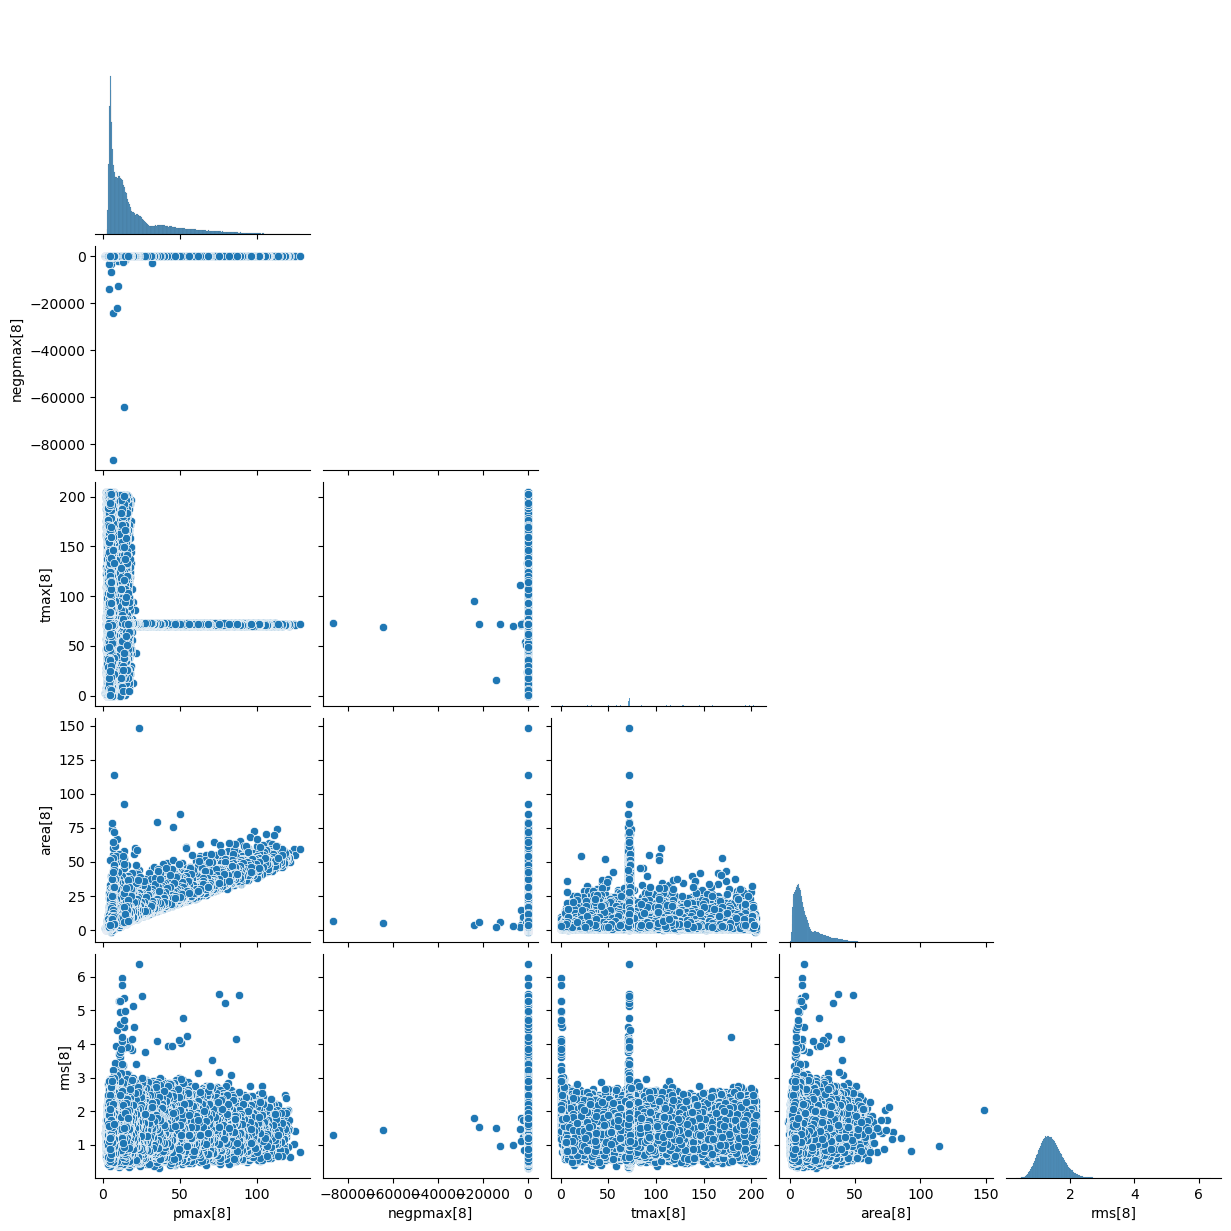

In [ ]:

data = development[['pmax[8]','negpmax[8]','tmax[8]','area[8]','rms[8]']]
sns.pairplot(data, corner=True)


### Reading 9
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


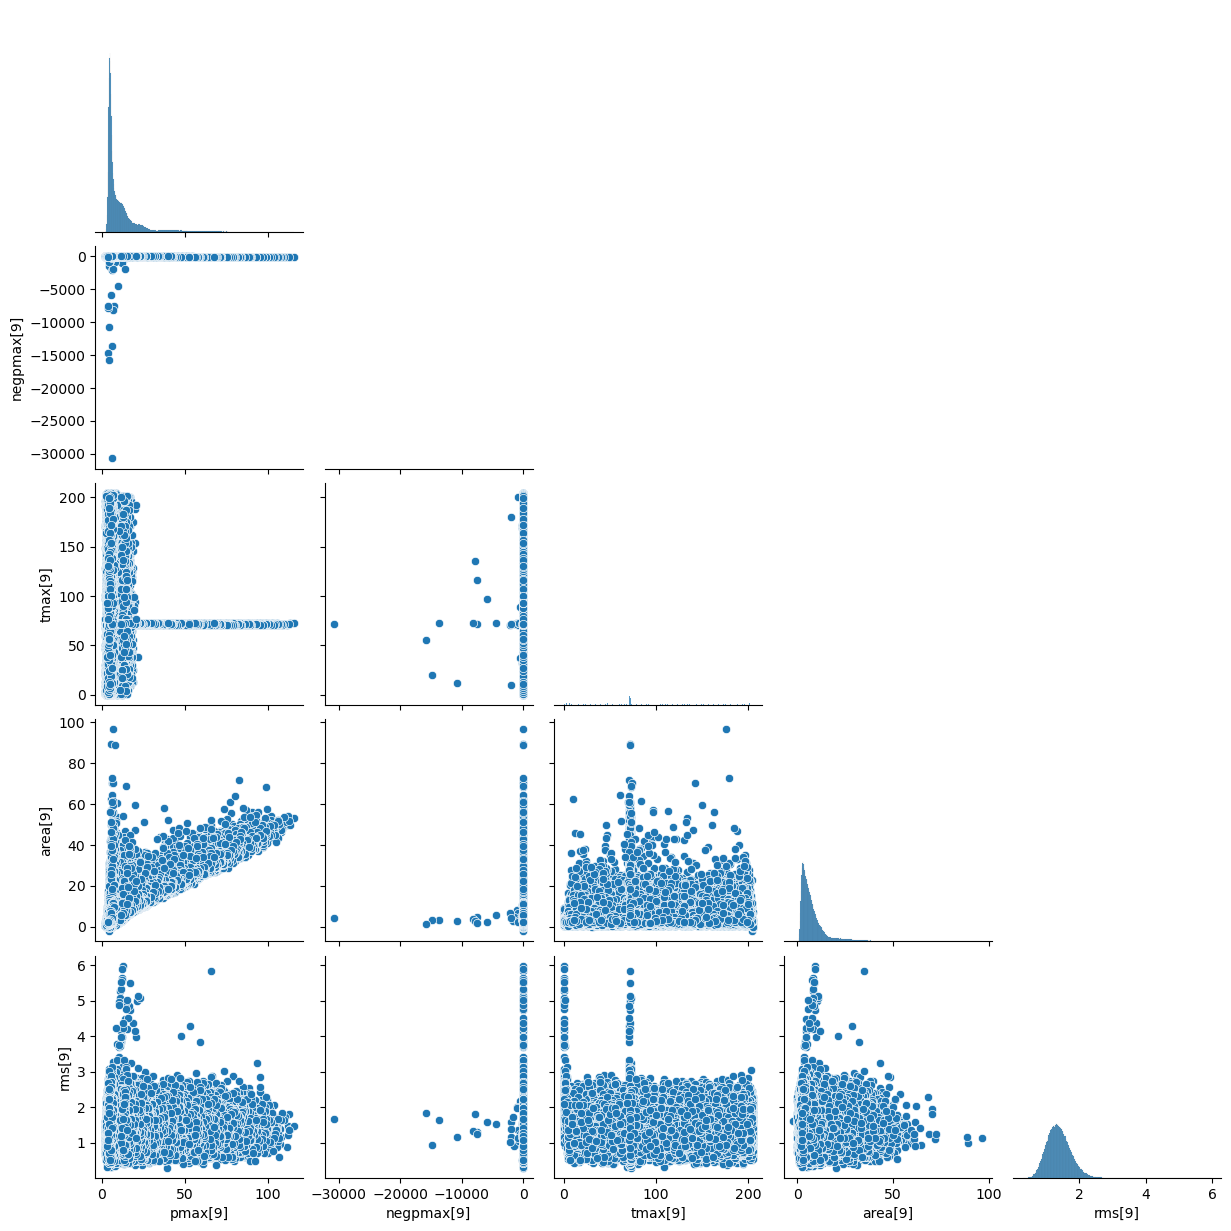

In [ ]:

data = development[['pmax[9]','negpmax[9]','tmax[9]','area[9]','rms[9]']]
sns.pairplot(data, corner=True)


### Reading 10
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


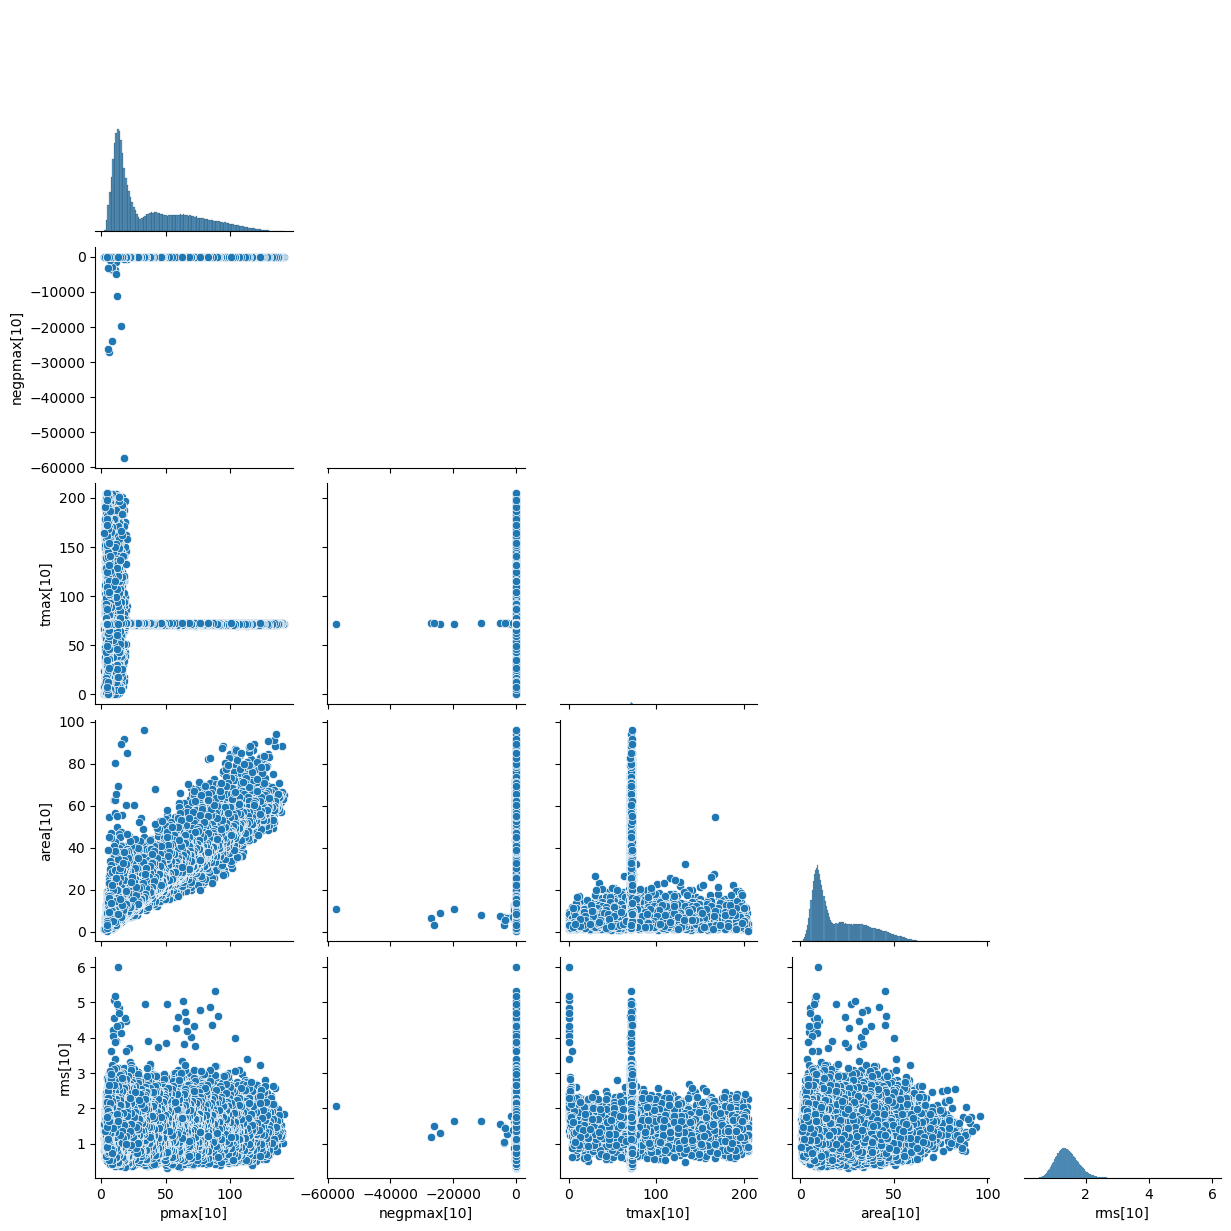

In [ ]:

data = development[['pmax[10]','negpmax[10]','tmax[10]','area[10]','rms[10]']]
sns.pairplot(data, corner=True)


### Reading 11
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


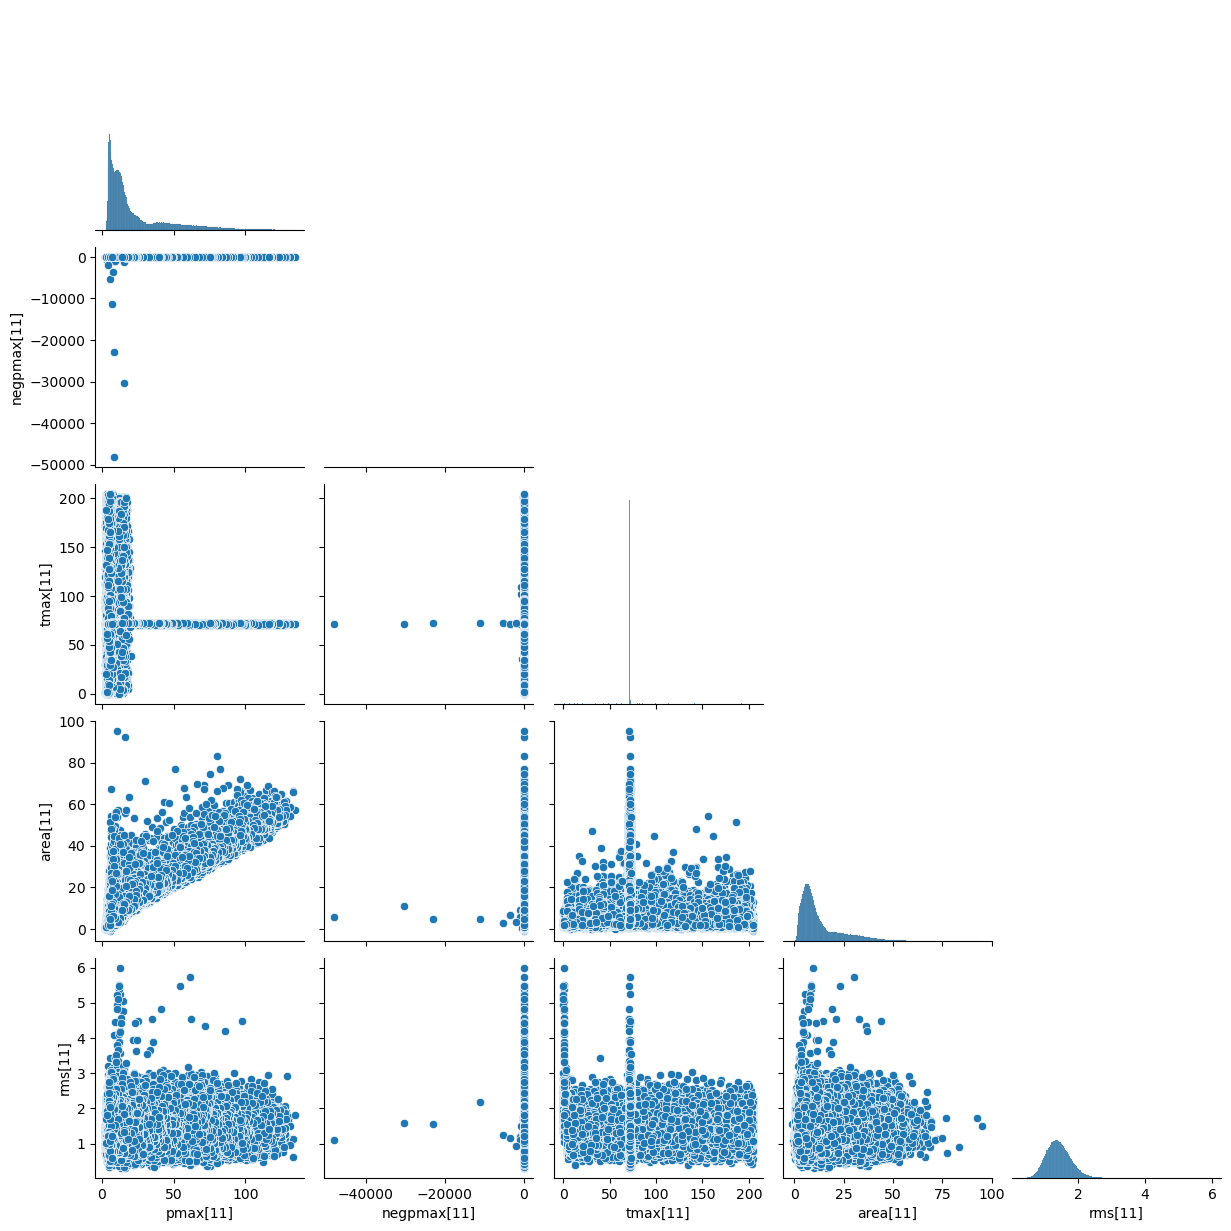

In [ ]:

data = development[['pmax[11]','negpmax[11]','tmax[11]','area[11]','rms[11]']]
sns.pairplot(data, corner=True)


### Reading 12
No evidence of non-linear relationships.
Analogously to the 8th reading, we observe that the pamx-area plot doesn't show a linear relationship, and the tmax from the previous reading.

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


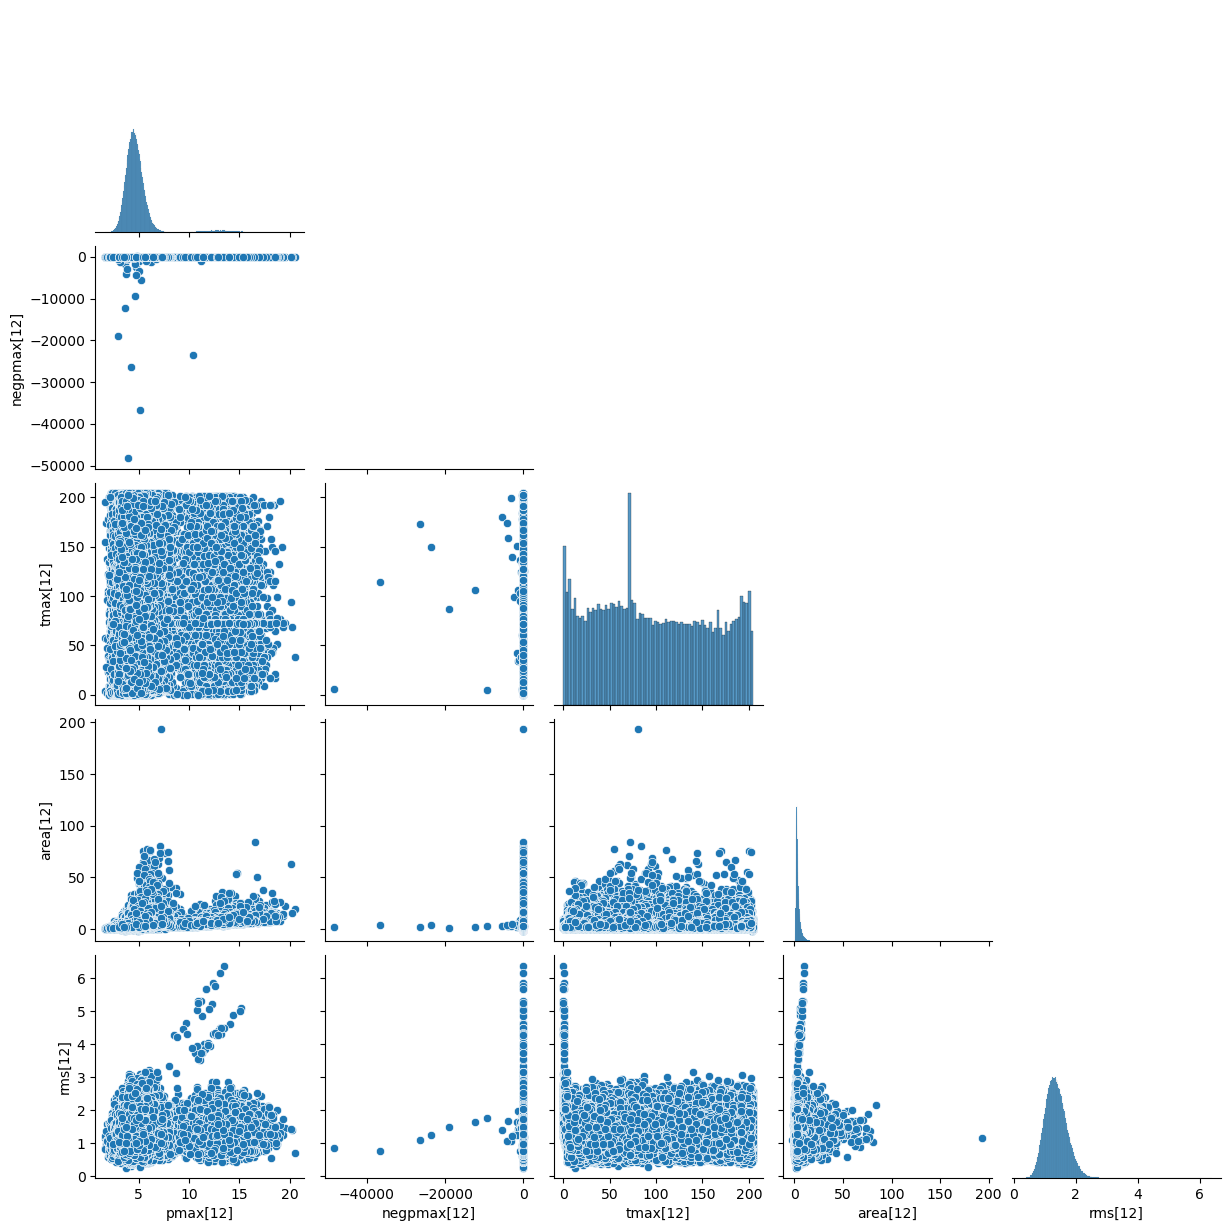

In [ ]:

data = development[['pmax[12]','negpmax[12]','tmax[12]','area[12]','rms[12]']]
sns.pairplot(data, corner=True)


### Reading 13
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


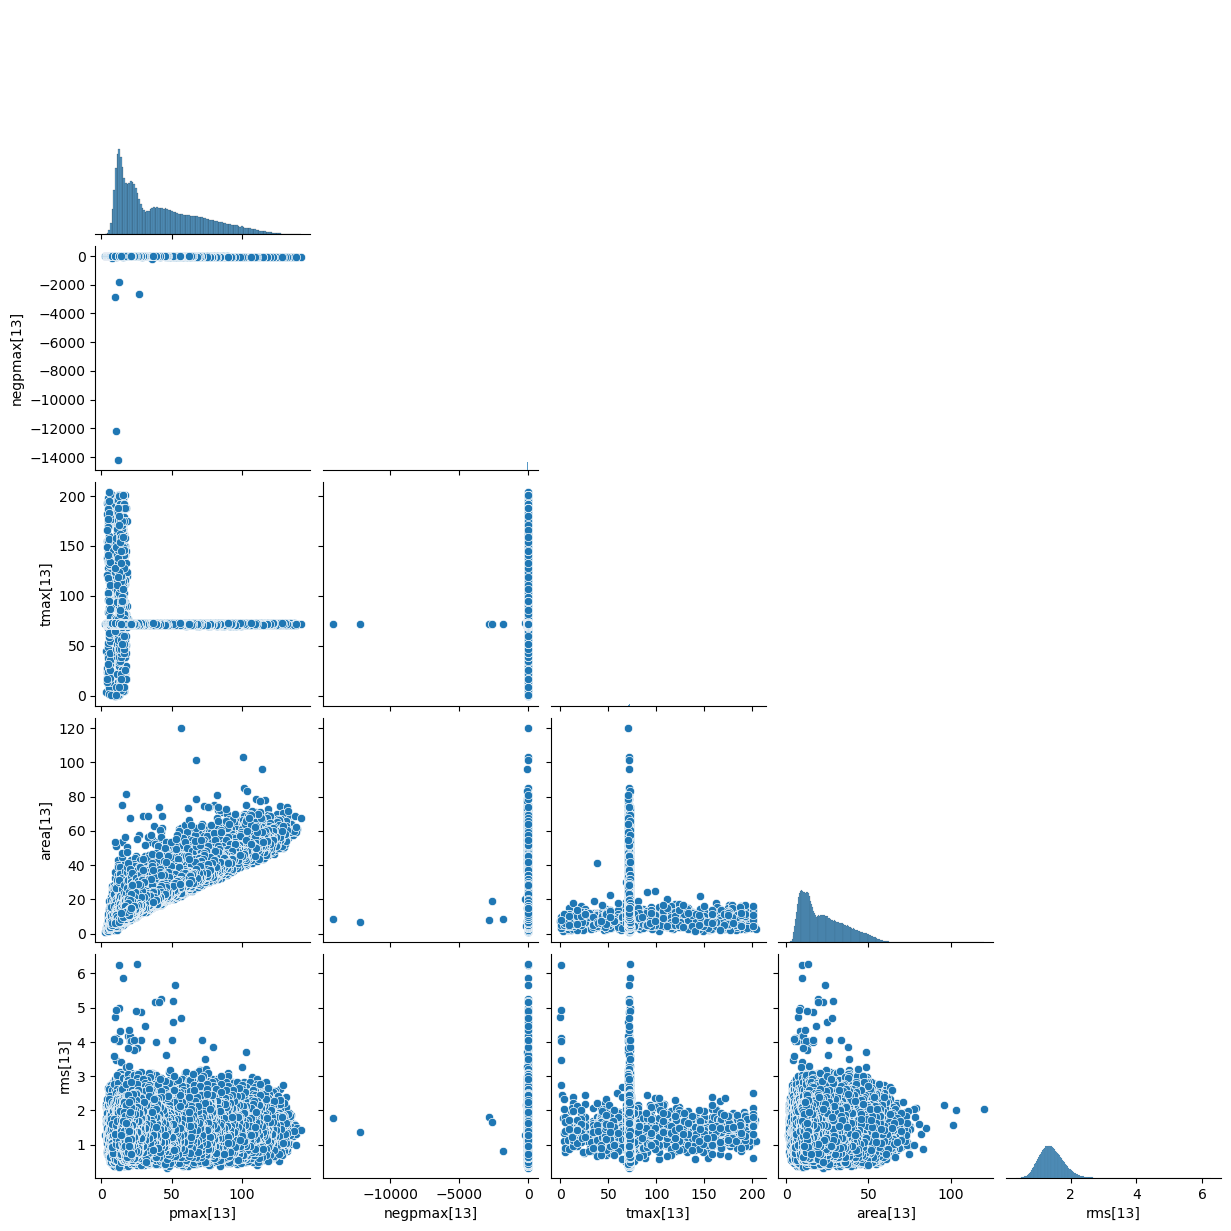

In [ ]:

data = development[['pmax[13]','negpmax[13]','tmax[13]','area[13]','rms[13]']]
sns.pairplot(data, corner=True)


### Reading 14
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


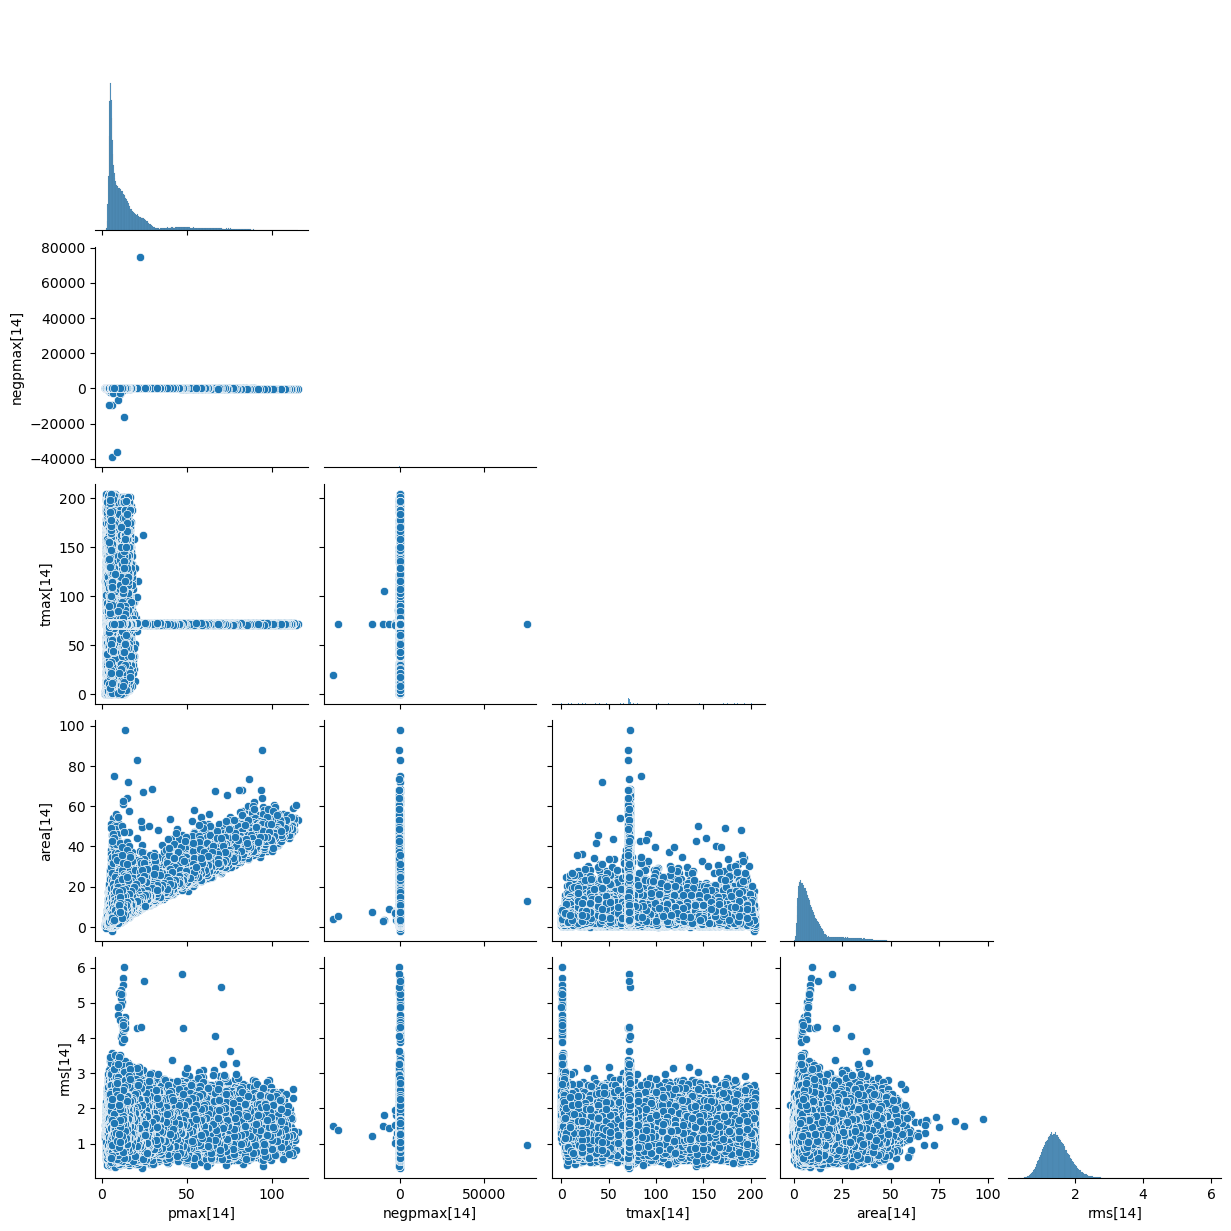

In [ ]:

data = development[['pmax[14]','negpmax[14]','tmax[14]','area[14]','rms[14]']]
sns.pairplot(data, corner=True)


### Reading 15
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


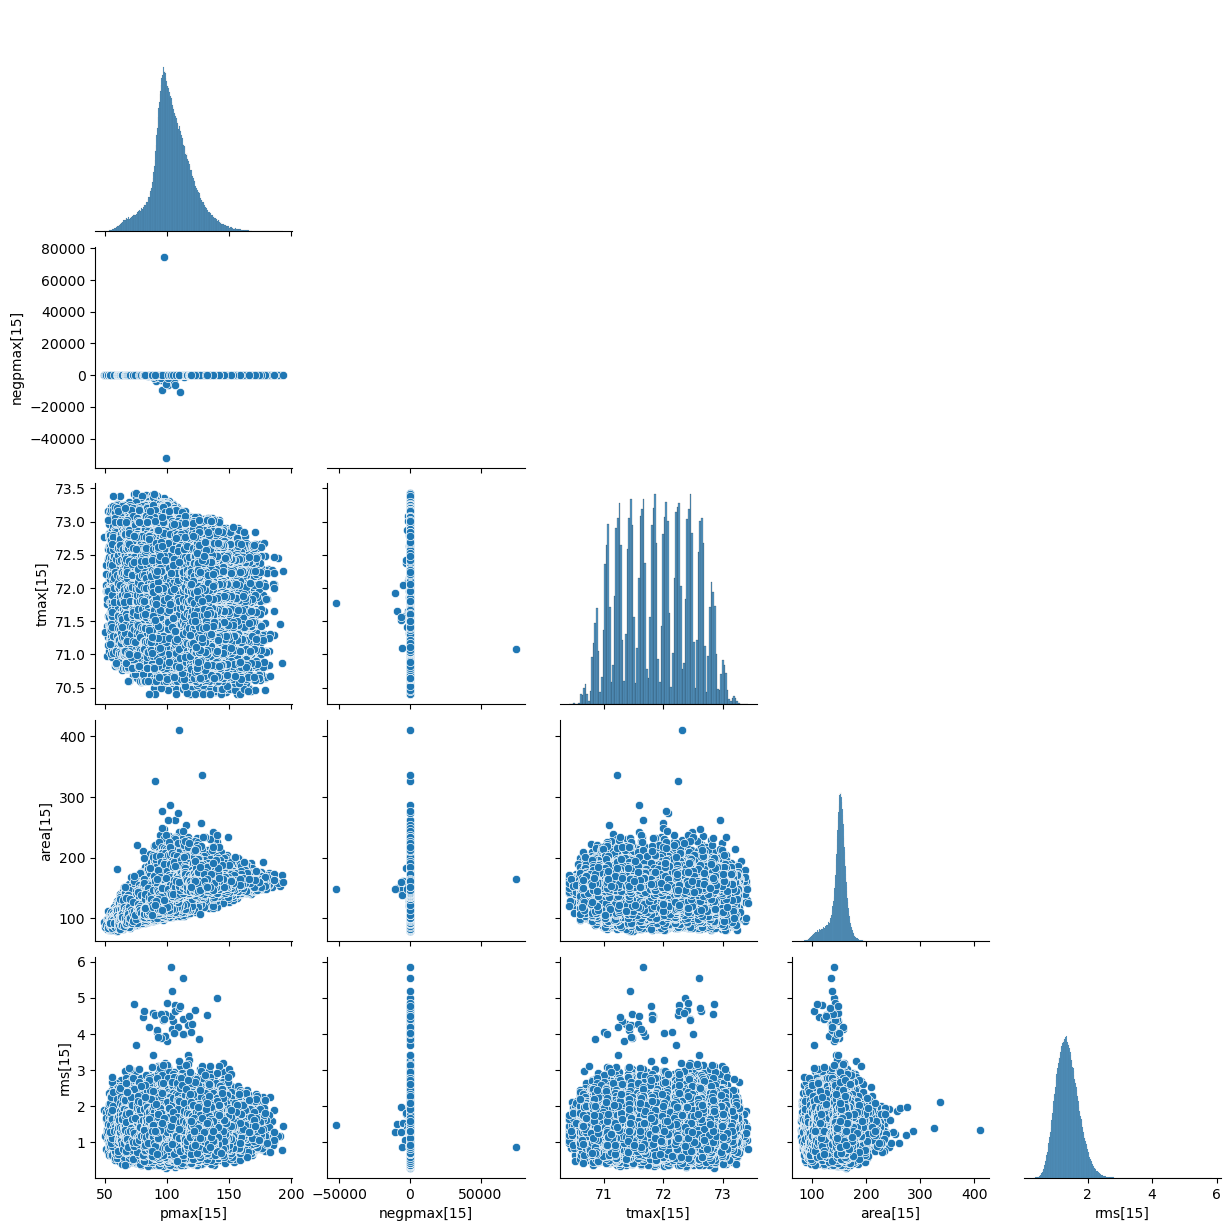

In [ ]:

data = development[['pmax[15]','negpmax[15]','tmax[15]','area[15]','rms[15]']]
sns.pairplot(data, corner=True)


### Reading 16
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


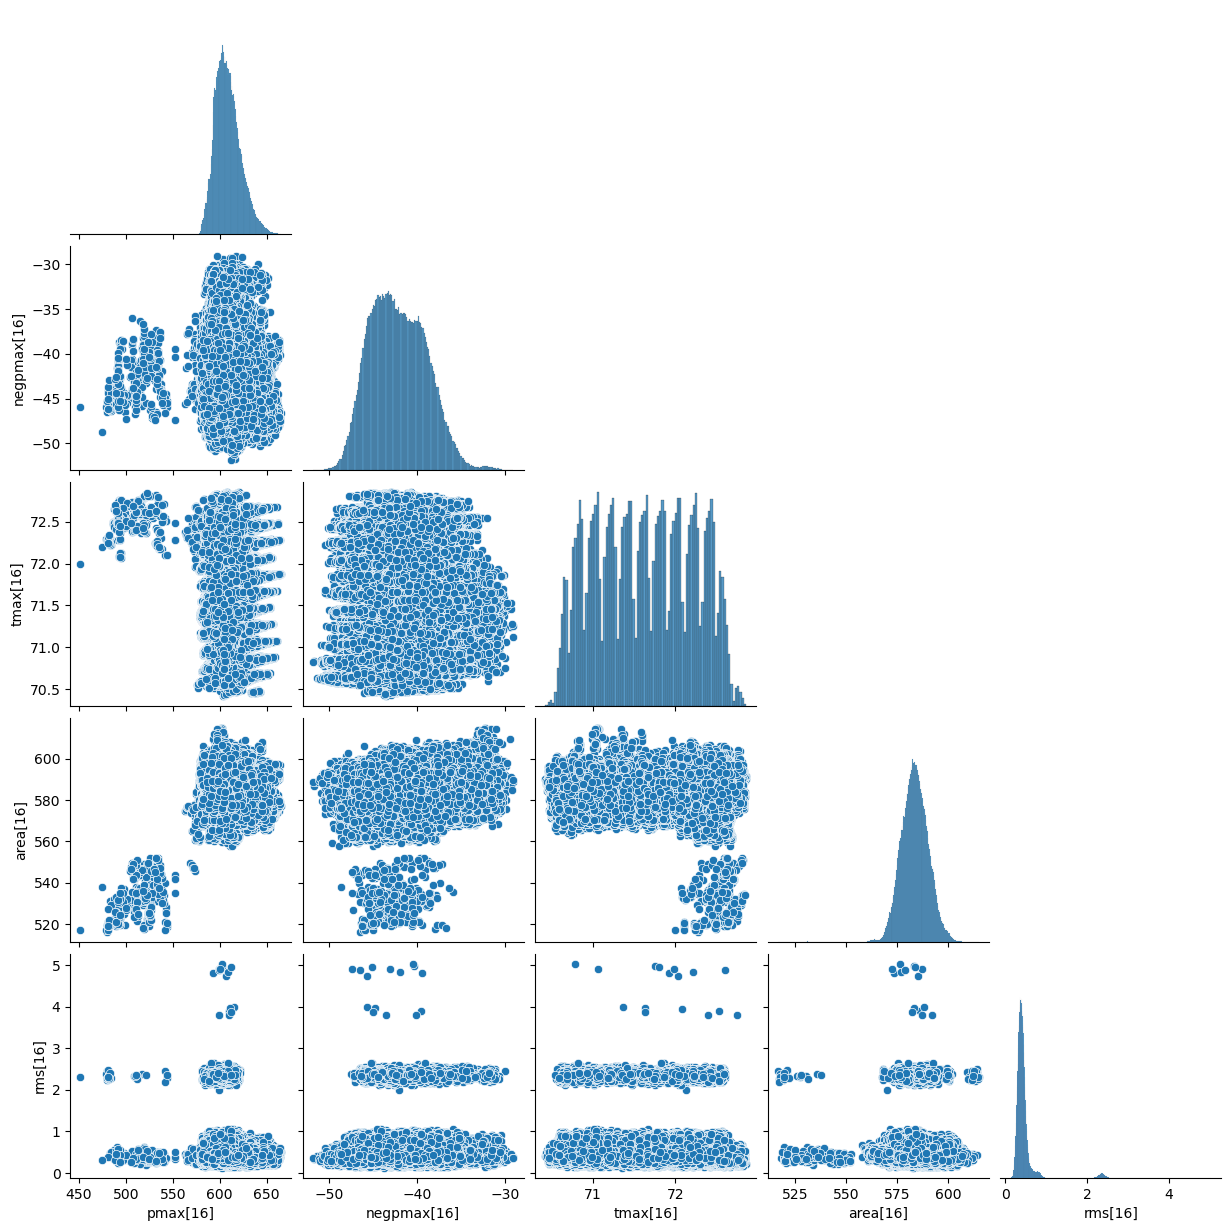

In [ ]:

data = development[['pmax[16]','negpmax[16]','tmax[16]','area[16]','rms[16]']]
sns.pairplot(data, corner=True)


### Reading 17
No evidence of non-linear relationships

/Users/xuyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


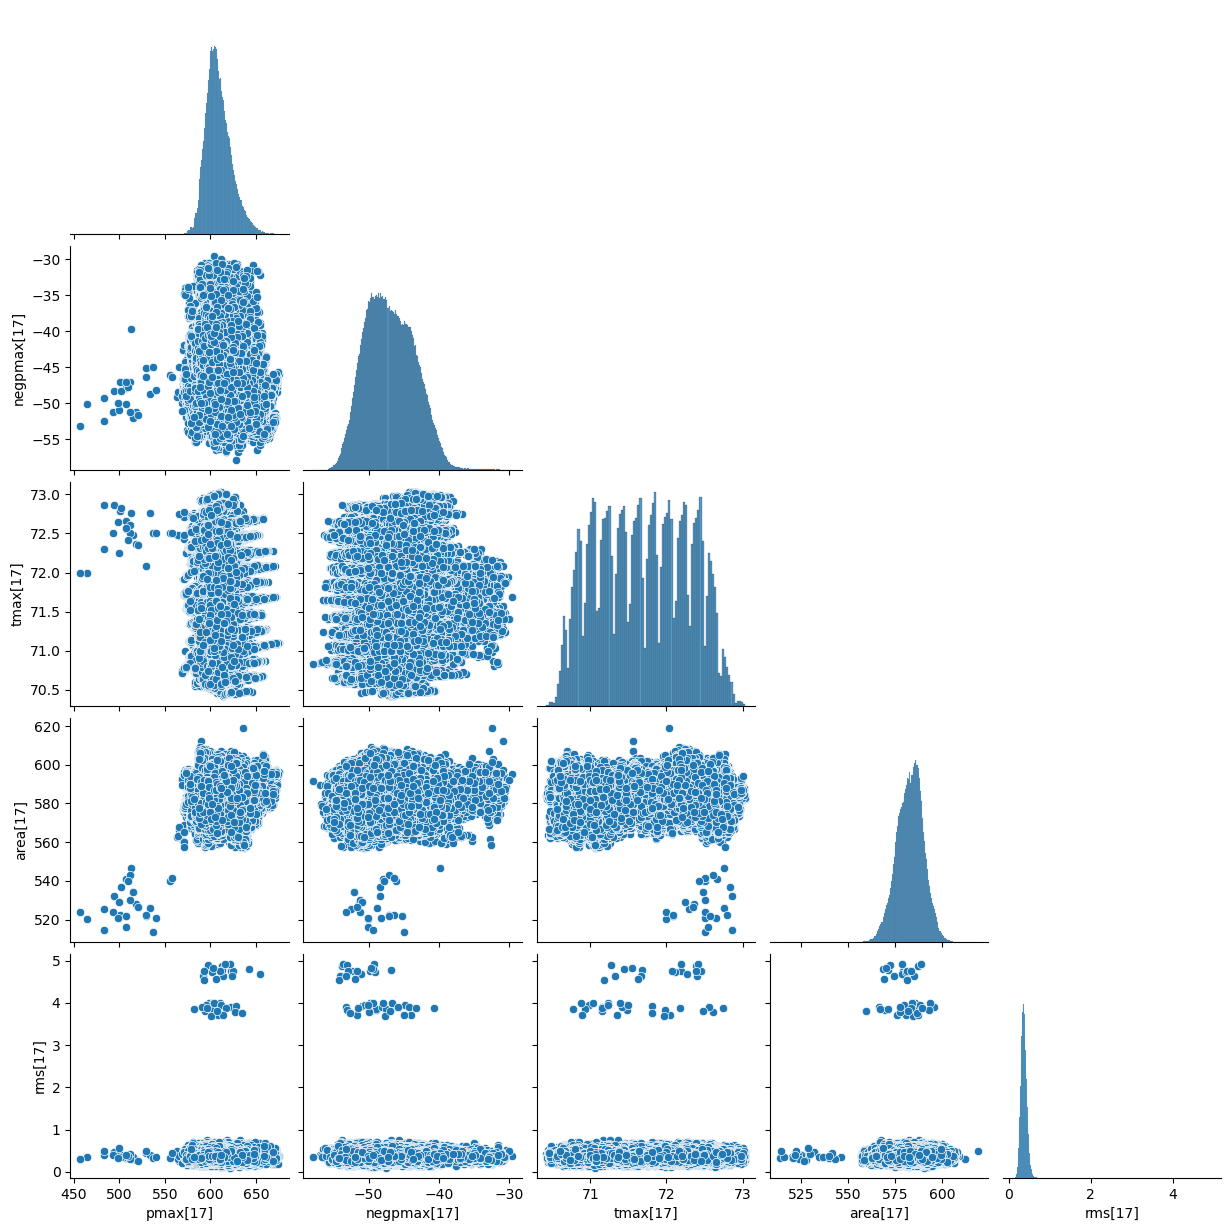

In [ ]:

data = development[['pmax[17]','negpmax[17]','tmax[17]','area[17]','rms[17]']]
sns.pairplot(data, corner=True)


In the last three grid we observe that all plots are notably different compared to the other readings. This result was expected, as these readings also showed an outlier behaviour in the histogram and z-score analysis. 

In conclusion, out of the 18 readings, the first, 8th, 13th, 16th, 17th, and 18th readings represent noise data. 

We proceed to delete the corresponding columns from the *development* dataset.

In [5]:
outlier_column_index=[0, 7, 12, 15, 16, 17]
columns_to_drop=[]

for index in outlier_column_index:
    columns_to_drop.append('pmax[%s]' % index)
    columns_to_drop.append('negpmax[%s]' % index)
    columns_to_drop.append('tmax[%s]' % index)
    columns_to_drop.append('area[%s]' % index)
    columns_to_drop.append('rms[%s]' % index)

dev_df=development.drop(columns=columns_to_drop)
eva_df=evaluation.drop(columns=columns_to_drop)
eva_df=eva_df.drop(columns=["Id"])

X=dev_df.drop(columns=['x', 'y'])
y=dev_df.loc[:,['x', 'y']]
rs=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Hyperparameter tuning
We can now work on hyperparameter tuning. We decide to use **Random Forest Regressor** as andressiorks oeleach feature at at imrpretability and it works on each feature at at ime, theefore no data normalization is required.

## RandomSearchCV
As a first approach to find the best combination of hyperparameters , we use the *RandomSearchCV* , which randomly tests out a fixed number of combinations out of the parameters set we provide. Due to the large amount of data, only part of the data is taken during the parameter adjustment stage.

In [20]:
# Due to the large amount of data, only part of the data is taken during the parameter adjustment stage.
tun_df=development.drop(columns=columns_to_drop)

X_tuning_train_dataset = []
y_tuning_test_dataset=[]

for i in range(0, len(tun_df), 100):
    subset1 = tun_df.iloc[i:i+100].head(3)
    X_tuning_train_dataset.append(subset1)

    subset2 = tun_df.iloc[i:i+100].tail(1)
    y_tuning_test_dataset.append(subset2)

tuning_train_df=pd.concat(X_tuning_train_dataset, ignore_index=False)
tuning_test_df=pd.concat(y_tuning_test_dataset, ignore_index=False)

X_tuning_train=tuning_train_df.drop(columns=['x', 'y'])
y_tuning_train=tuning_train_df.loc[:,['x', 'y']]

X_tuning_test=tuning_test_df.drop(columns=['x', 'y'])
y_tuning_test=tuning_test_df.loc[:,['x', 'y']]


In [ ]:
n_estimators_range=[50,100, 200, 300]
max_features_range=['auto','sqrt','log2']
max_depth_range=[5, 10, 20]
max_depth_range.append(None)
min_samples_split_range=[2,5,10,20,50]
min_samples_leaf_range=[1, 2, 5, 10, 20]

rfr_hp_range={'n_estimators':n_estimators_range,
              'max_features':max_features_range,
              'max_depth':max_depth_range,
              'min_samples_split':min_samples_split_range,
              'min_samples_leaf':min_samples_leaf_range
             }
print(rfr_hp_range)

{'n_estimators': [50, 100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [ ]:
rfr_base=RandomForestRegressor()
rfr_random=RandomizedSearchCV(estimator=rfr_base,
                              param_distributions=rfr_hp_range,
                              n_iter=200,
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              random_state=42)
rfr_random.fit(X_tuning_train,y_tuning_train)

best_hp_now=rfr_random.best_params_
print(best_hp_now)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/xuyan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
365 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
186 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xuyan/anacond

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


We use now the hyperparameters returned by the Random Search to apply the Random Forest on the whole dataset. 

In [ ]:
rfr = RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None,random_state=rs)
rfr.fit(X_train, y_train)

y_rfr=rfr.predict(X_test)

distance=np.mean(np.sqrt(np.sum((y_rfr - y_test) ** 2, axis=1)))
print(distance)
eva_y=rfr.predict(eva_df)
df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('output0.csv', index=False, sep=',')

4.576920443421794


We see the distance between our prediction and the ground truth is of 4.57692044342174. We will try to improve this result by testing another set of parameters.
We add more values ofor the number of estimetors, the maximum depth. 

In [ ]:
n_estimators_range=[100, 150, 200, 250, 300, 350]
max_features_range=['auto','sqrt','log2']
max_depth_range=[5, 10, 20, 50, 100]
max_depth_range.append(None)
min_samples_split_range=[2,5,10,20,50]
min_samples_leaf_range=[1, 2, 5, 10, 20]

rfr_hp_range={'n_estimators':n_estimators_range,
              'max_features':max_features_range,
              'max_depth':max_depth_range,
              'min_samples_split':min_samples_split_range,
              'min_samples_leaf':min_samples_leaf_range
             }
print(rfr_hp_range)

{'n_estimators': [100, 150, 200, 250, 300, 350], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 20, 50, 100, None], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [ ]:
rfr_base=RandomForestRegressor()
rfr_random=RandomizedSearchCV(estimator=rfr_base,
                              param_distributions=rfr_hp_range,
                              n_iter=200,
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              random_state=42)
rfr_random.fit(X_tuning_train,y_tuning_train)

best_hp_now=rfr_random.best_params_
print(best_hp_now)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/xuyan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
330 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
194 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xuyan/anacond

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}


The random Search selected higher values for n_estimators, max_depth, min_sampes _leaf, respectively going from 100 to 200, from None to 50, and from 2 to 5.

In [ ]:
rfr = RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=50,random_state=rs)
rfr.fit(X_train, y_train)
y_rfr=rfr.predict(X_test)
distance=np.mean(np.sqrt(np.sum((y_rfr - y_test) ** 2, axis=1)))
print(distance)

eva_y=rfr.predict(eva_df)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('output2.csv', index=False, sep=',')


4.494897256772761


Our distance has improved. We keep selecting a higher range of estimators of iteratons depth, while also raising the number of iterations from 200 to 300.

In [ ]:
n_estimators_range=[150, 200, 250, 300, 350, 500]
max_features_range=['auto','sqrt','log2']
max_depth_range=[50, 100, 150, 200, 300]
max_depth_range.append(None)
min_samples_split_range=[2,5,10,20,50]
min_samples_leaf_range=[1, 2, 5, 10, 20]

rfr_hp_range={'n_estimators':n_estimators_range,
              'max_features':max_features_range,
              'max_depth':max_depth_range,
              'min_samples_split':min_samples_split_range,
              'min_samples_leaf':min_samples_leaf_range
             }
print(rfr_hp_range)

rfr_base=RandomForestRegressor()
rfr_random=RandomizedSearchCV(estimator=rfr_base,
                              param_distributions=rfr_hp_range,
                              n_iter=300,
                              n_jobs=-1,
                              cv=10,
                              verbose=1,
                              random_state=42)
rfr_random.fit(X_tuning_train,y_tuning_train)

best_hp_now=rfr_random.best_params_
print(best_hp_now)

{'n_estimators': [150, 200, 250, 300, 350, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 100, 150, 200, 300, None], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [1, 2, 5, 10, 20]}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


/Users/xuyan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1050 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
534 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/xuyan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xuyan/anacon

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 150}


We observe that by increasing the number of estimators and the maximum depth, we keep getting better results.

In [ ]:
rfr = RandomForestRegressor(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=150,random_state=rs)
rfr.fit(X_train, y_train)
y_rfr=rfr.predict(X_test)
distance=np.mean(np.sqrt(np.sum((y_rfr - y_test) ** 2, axis=1)))
print(distance)

eva_y=rfr.predict(eva_df)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('output3.csv', index=False, sep=',')


4.441804259159674


In order to save time and observe the effect of increasing n_estimators, I set n_estimators to 800 and 1200 to see the running effect directly.

In [ ]:
rfr = RandomForestRegressor(n_estimators=800,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=150,random_state=rs)
rfr.fit(X_train, y_train)
y_rfr=rfr.predict(X_test)
distance=np.mean(np.sqrt(np.sum((y_rfr - y_test) ** 2, axis=1)))
print(distance)

eva_y=rfr.predict(eva_df)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('output4.csv', index=False, sep=',')

4.426690679410952


In [ ]:
rfr = RandomForestRegressor(n_estimators=1200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=200,random_state=rs)
rfr.fit(X_train, y_train)
y_rfr=rfr.predict(X_test)
distance=np.mean(np.sqrt(np.sum((y_rfr - y_test) ** 2, axis=1)))
print(distance)

eva_y=rfr.predict(eva_df)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('output5.csv', index=False, sep=',')

4.420698153416437


It seems that no progress can be made by increasing n_estimators

In [2]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=64, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


model = build_model(units=128, activation='relu', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)


Epoch 1/50
7710/7710 [==============================] - 4s 485us/step - loss: 5149.0020 - val_loss: 2198.6707
Epoch 2/50
7710/7710 [==============================] - 4s 484us/step - loss: 789.8791 - val_loss: 769.4656
Epoch 3/50
7710/7710 [==============================] - 4s 475us/step - loss: 137.9995 - val_loss: 825.5518
Epoch 4/50
7710/7710 [==============================] - 4s 471us/step - loss: 80.2341 - val_loss: 934.8686
Epoch 5/50
7710/7710 [==============================] - 3s 453us/step - loss: 95.9943 - val_loss: 1189.6565
Epoch 6/50
7710/7710 [==============================] - 3s 453us/step - loss: 69.4150 - val_loss: 1065.1541
Epoch 7/50
7710/7710 [==============================] - 3s 454us/step - loss: 81.0731 - val_loss: 1135.2229
Epoch 8/50
7710/7710 [==============================] - 3s 450us/step - loss: 66.1952 - val_loss: 1027.7122
Epoch 9/50
7710/7710 [==============================] - 3s 453us/step - loss: 60.0229 - val_loss: 926.1052
Epoch 10/50
7710/7710 [=====

In [ ]:
distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

5.29618979662101


Modified activation function

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=64, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


model = build_model(units=128, activation='sigmoid', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 4s 489us/step - loss: 36121.3906 - val_loss: 3326.0532
Epoch 2/50
7710/7710 [==============================] - 4s 466us/step - loss: 744.3203 - val_loss: 54.5026
Epoch 3/50
7710/7710 [==============================] - 4s 477us/step - loss: 34.1684 - val_loss: 35.5989
Epoch 4/50
7710/7710 [==============================] - 4s 485us/step - loss: 26.8506 - val_loss: 28.7888
Epoch 5/50
7710/7710 [==============================] - 4s 474us/step - loss: 23.5371 - val_loss: 24.8251
Epoch 6/50
7710/7710 [==============================] - 4s 468us/step - loss: 21.6698 - val_loss: 23.9111
Epoch 7/50
7710/7710 [==============================] - 4s 466us/step - loss: 20.2351 - val_loss: 23.5579
Epoch 8/50
7710/7710 [==============================] - 4s 466us/step - loss: 19.0806 - val_loss: 21.7137
Epoch 9/50
7710/7710 [==============================] - 4s 465us/step - loss: 18.3771 - val_loss: 21.6108
Epoch 10/50
7710/7710 [=================

add parameter: metrics

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=64, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "acc"])
    return model


model = build_model(units=128, activation='sigmoid', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 4s 506us/step - loss: 36518.9766 - mae: 140.9164 - acc: 0.6997 - val_loss: 3259.9126 - val_mae: 41.3758 - val_acc: 0.9814
Epoch 2/50
7710/7710 [==============================] - 4s 486us/step - loss: 735.8427 - mae: 14.1608 - acc: 0.9852 - val_loss: 56.2554 - val_mae: 4.3699 - val_acc: 0.9864
Epoch 3/50
7710/7710 [==============================] - 4s 470us/step - loss: 35.2692 - mae: 3.8106 - acc: 0.9864 - val_loss: 37.2252 - val_mae: 3.5812 - val_acc: 0.9873
Epoch 4/50
7710/7710 [==============================] - 4s 465us/step - loss: 27.7881 - mae: 3.4778 - acc: 0.9871 - val_loss: 30.9284 - val_mae: 3.3801 - val_acc: 0.9878
Epoch 5/50
7710/7710 [==============================] - 4s 472us/step - loss: 24.6439 - mae: 3.3287 - acc: 0.9875 - val_loss: 27.9025 - val_mae: 3.3196 - val_acc: 0.9871
Epoch 6/50
7710/7710 [==============================] - 4s 475us/step - loss: 22.6843 - mae: 3.2229 - acc: 0.9876 - val_loss: 25.3090 - val_

In [ ]:
eva_df_scaled = scaler.transform(eva_df)

eva_y=model.predict(eva_df_scaled)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('tensor_output1.csv', index=False, sep=',')

4016/4016 [==============================] - 1s 256us/step


pmax and area are two features with linear correlation, but removing them here does not improve accuracy.

In [ ]:
pmax_features = []
area_features = []

for i in range(0, 18):
    if(i in outlier_column_index):
        continue
    pmax_features.append("pmax[%s]" % (i))
    area_features.append("area[%s]" % (i))

X_train_drop_pmax = X_train.drop(columns=pmax_features + area_features)
X_test_drop_pmax=X_test.drop(columns=pmax_features + area_features)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_drop_pmax)
X_test_scaled = scaler.transform(X_test_drop_pmax)

def build_model(units=64, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train_drop_pmax.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "acc"])
    return model


model = build_model(units=128, activation='sigmoid', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 5s 618us/step - loss: 37451.3320 - mae: 145.4534 - acc: 0.6329 - val_loss: 3946.4587 - val_mae: 48.1615 - val_acc: 0.9624
Epoch 2/50
7710/7710 [==============================] - 5s 588us/step - loss: 982.5688 - mae: 18.7409 - acc: 0.9713 - val_loss: 134.8243 - val_mae: 7.5034 - val_acc: 0.9760
Epoch 3/50
7710/7710 [==============================] - 5s 599us/step - loss: 109.7859 - mae: 6.6884 - acc: 0.9757 - val_loss: 100.2411 - val_mae: 6.3630 - val_acc: 0.9771
Epoch 4/50
7710/7710 [==============================] - 5s 592us/step - loss: 93.9059 - mae: 6.1261 - acc: 0.9765 - val_loss: 89.4347 - val_mae: 5.9818 - val_acc: 0.9784
Epoch 5/50
7710/7710 [==============================] - 5s 618us/step - loss: 86.8402 - mae: 5.8874 - acc: 0.9776 - val_loss: 82.6455 - val_mae: 5.7326 - val_acc: 0.9791
Epoch 6/50
7710/7710 [==============================] - 5s 599us/step - loss: 82.1001 - mae: 5.7223 - acc: 0.9783 - val_loss: 79.5731 - v

# parameters tuning
https://keras.io/guides/keras_tuner/getting_started/

In [ ]:
import keras
from keras import layers
from keras_tuner import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', min_value=1, max_value=5, step=1)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='sigmoid'))
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(layers.Dense(units=2))

    model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mse',
                  metrics=['mae', 'acc'])
    return model


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=3,
    overwrite=True,
    directory='my_tuning_directory',
    project_name='my_first_tuning_project'
)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Trial 22 Complete [00h 13m 39s]
val_loss: 33.81149164835612

Best val_loss So Far: 25.951648076375324
Total elapsed time: 13h 36m 54s

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
1                 |4                 |num_layers
384               |480               |units_0
0.4               |0.3               |dropout_0
0.00019167        |0.00018093        |learning_rate
480               |96                |units_1
0.3               |0                 |dropout_1
96                |160               |units_2
0.1               |0.1               |dropout_2
192               |96                |units_3
0.1               |0.1               |dropout_3
64                |256               |units_4
0.3               |0.4               |dropout_4

Epoch 1/50
9638/9638 [==============================] - 6s 578us/step - loss: 61189.4531 - mae: 205.5058 - acc: 0.5173 - val_loss: 12498.0029 - val_mae: 94.9019 - val_acc: 0.5841
Epoch 2/50
9638/9638 [============

KeyboardInterrupt: 

From the output log (The one which distance result is 4.181203413941417), we can see that loss is less than val_loss, so learning_rate is added here to prevent overfitting.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=128, activation='sigmoid', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "acc"])
    return model

# 0.00018093 is from the failed parameter adjustment
optimizer=keras.optimizers.Adam(learning_rate=0.00018093)
model = build_model()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 4s 498us/step - loss: 37694.9531 - mae: 143.5186 - acc: 0.6749 - val_loss: 3219.7368 - val_mae: 40.9447 - val_acc: 0.9757
Epoch 2/50
7710/7710 [==============================] - 4s 492us/step - loss: 727.7487 - mae: 14.0917 - acc: 0.9848 - val_loss: 54.7948 - val_mae: 4.3323 - val_acc: 0.9867
Epoch 3/50
7710/7710 [==============================] - 4s 474us/step - loss: 35.1003 - mae: 3.8023 - acc: 0.9867 - val_loss: 36.3393 - val_mae: 3.6013 - val_acc: 0.9880
Epoch 4/50
7710/7710 [==============================] - 4s 497us/step - loss: 28.3051 - mae: 3.4808 - acc: 0.9870 - val_loss: 32.2650 - val_mae: 3.4023 - val_acc: 0.9880
Epoch 5/50
7710/7710 [==============================] - 4s 485us/step - loss: 25.2632 - mae: 3.3318 - acc: 0.9875 - val_loss: 29.5814 - val_mae: 3.3290 - val_acc: 0.9870
Epoch 6/50
7710/7710 [==============================] - 4s 472us/step - loss: 23.2197 - mae: 3.2328 - acc: 0.9881 - val_loss: 26.4833 - val_

Dropout is also a good way to prevent overfitting

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=128, activation='sigmoid', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_dim=X_train.shape[1]),
        layers.Dropout(0.2),
        layers.Dense(units,activation=activation),
        layers.Dropout(0.2),
        layers.Dense(2, activation=None)
    ])
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mae", "acc"])
    return model


model = build_model()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 4s 533us/step - loss: 39110.8477 - mae: 148.0539 - acc: 0.6724 - val_loss: 3353.4734 - val_mae: 42.6788 - val_acc: 0.9773
Epoch 2/50
7710/7710 [==============================] - 4s 532us/step - loss: 1392.3368 - mae: 27.0667 - acc: 0.9584 - val_loss: 110.8190 - val_mae: 6.5787 - val_acc: 0.9837
Epoch 3/50
7710/7710 [==============================] - 4s 525us/step - loss: 654.0359 - mae: 19.8207 - acc: 0.9564 - val_loss: 70.2118 - val_mae: 5.6658 - val_acc: 0.9838
Epoch 4/50
7710/7710 [==============================] - 4s 520us/step - loss: 613.8939 - mae: 19.1587 - acc: 0.9584 - val_loss: 54.0549 - val_mae: 4.8853 - val_acc: 0.9852
Epoch 5/50
7710/7710 [==============================] - 4s 526us/step - loss: 587.8549 - mae: 18.7609 - acc: 0.9601 - val_loss: 54.8136 - val_mae: 5.1176 - val_acc: 0.9837
Epoch 6/50
7710/7710 [==============================] - 4s 533us/step - loss: 576.0655 - mae: 18.5359 - acc: 0.9610 - val_loss: 46.9

from above the learning_rate is more efficient than dropout

In [8]:
from tensorflow.keras.optimizers import schedules

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(units=128, activation='sigmoid', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(units, activation=activation),
        layers.Dense(2)
    ])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "acc"])
    return model


learning_rate_schedule = schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)

optimizer=keras.optimizers.Adam(learning_rate=learning_rate_schedule)
model = build_model()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

Epoch 1/50
7710/7710 [==============================] - 4s 498us/step - loss: 38287.9414 - mae: 144.9188 - acc: 0.6778 - val_loss: 3327.0979 - val_mae: 41.7489 - val_acc: 0.9808
Epoch 2/50
7710/7710 [==============================] - 4s 480us/step - loss: 745.6046 - mae: 14.2567 - acc: 0.9848 - val_loss: 54.9791 - val_mae: 4.3390 - val_acc: 0.9856
Epoch 3/50
7710/7710 [==============================] - 4s 470us/step - loss: 34.6714 - mae: 3.7806 - acc: 0.9868 - val_loss: 35.1402 - val_mae: 3.5700 - val_acc: 0.9869
Epoch 4/50
7710/7710 [==============================] - 4s 473us/step - loss: 27.0648 - mae: 3.4555 - acc: 0.9871 - val_loss: 29.7823 - val_mae: 3.3795 - val_acc: 0.9875
Epoch 5/50
7710/7710 [==============================] - 4s 470us/step - loss: 23.7843 - mae: 3.3063 - acc: 0.9874 - val_loss: 27.4195 - val_mae: 3.2988 - val_acc: 0.9880
Epoch 6/50
7710/7710 [==============================] - 4s 471us/step - loss: 21.8423 - mae: 3.2058 - acc: 0.9878 - val_loss: 24.7446 - val_

Due to limited computing resources, manual modification and experimental methods are used to adjust parameters.

In [ ]:
# I ran this part on kaggle, so there is no output
from tensorflow.keras.optimizers import schedules

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(activation='sigmoid', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(512, activation=activation, input_dim=X_train.shape[1]),
        #layers.Dropout(0.2),
        layers.Dense(512, activation=activation),
        #layers.Dropout(0.2),
        layers.Dense(2, activation=None)
    ])
    
    learning_rate_schedule = schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate_schedule)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mae", "acc"])
    return model


model = build_model()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

distance=np.mean(np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1)))
print(distance)

In [ ]:
eva_df_scaled = scaler.transform(eva_df)

eva_y=model.predict(eva_df_scaled)

df = pd.DataFrame(eva_y, columns=['Id', 'Predicted'])
df['Predicted'] = df.apply(lambda row: f"{row['Id']:.1f}|{row['Predicted']:.1f}", axis=1)
df['Id'] = df.index
df.to_csv('tensor_output.csv', index=False, sep=',')